# BHmodified

$z_t$ process:
$$
    dZ_t^1 = \mu_1(z_t^1)dt + \sigma_1(z_t^1)dW^1_t\\
    dZ_t^2 = - \rho(Z_t^2 - \mu_2)dt + \sqrt{Z_t^2}\sigma_2(Z_t^2)dW_t
$$  

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import time
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')
from utilities import dLambda, ddLambda, weightPITemp, zDrift, damageDrift, relativeEntropy
from supportfunctions import PDESolver_2d, finiteDiff
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams["lines.linewidth"] = 3
data_dir = os.path.dirname(os.getcwd()) + '/data/solution/'
figDir = os.path.dirname(os.getcwd())+ '/figures/'

In [104]:
import numpy as np
# from estimate_damages import *
from IPython.core.display import display, HTML
import plotly.io as pio
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

try:   
    import plotly.graph_objs as go
    from plotly.tools import make_subplots
    from plotly.offline import init_notebook_mode, iplot
#     import plotly.express as px
except ImportError:
    print("Installing plotly. This may take a while.")
    from pip._internal import main as pipmain
    pipmain(['install', 'plotly'])
    import plotly.graph_objs as go
    from plotly.subplots import make_subplots
    from plotly.offline import init_notebook_mode, iplot
#     import plotly.express as px

# init_notebook_mode()
# quad_rule = 'Legendre_5sd'

In [36]:
# damage function
ȳ = 2
γ1 = 0.00017674741764803637
γ2 = 2*0.0021810708664979964
γ3_list = np.array([0, 2*0.01968918, 2*0.38530522805673834])
# temperature
y = np.arange(0,5+0.01,0.01)
dmg_low = np.exp(- γ1*y - γ2/2*y**2 - γ3_list[0]/2*(y - ȳ)**2*(y>ȳ))
dmg_high = np.exp(- γ1*y - γ2/2*y**2 - γ3_list[1]/2*(y - ȳ)**2*(y>ȳ))
dmg_extreme = np.exp(- γ1*y - γ2/2*y**2 - γ3_list[2]/2*(y - ȳ)**2*(y>ȳ))

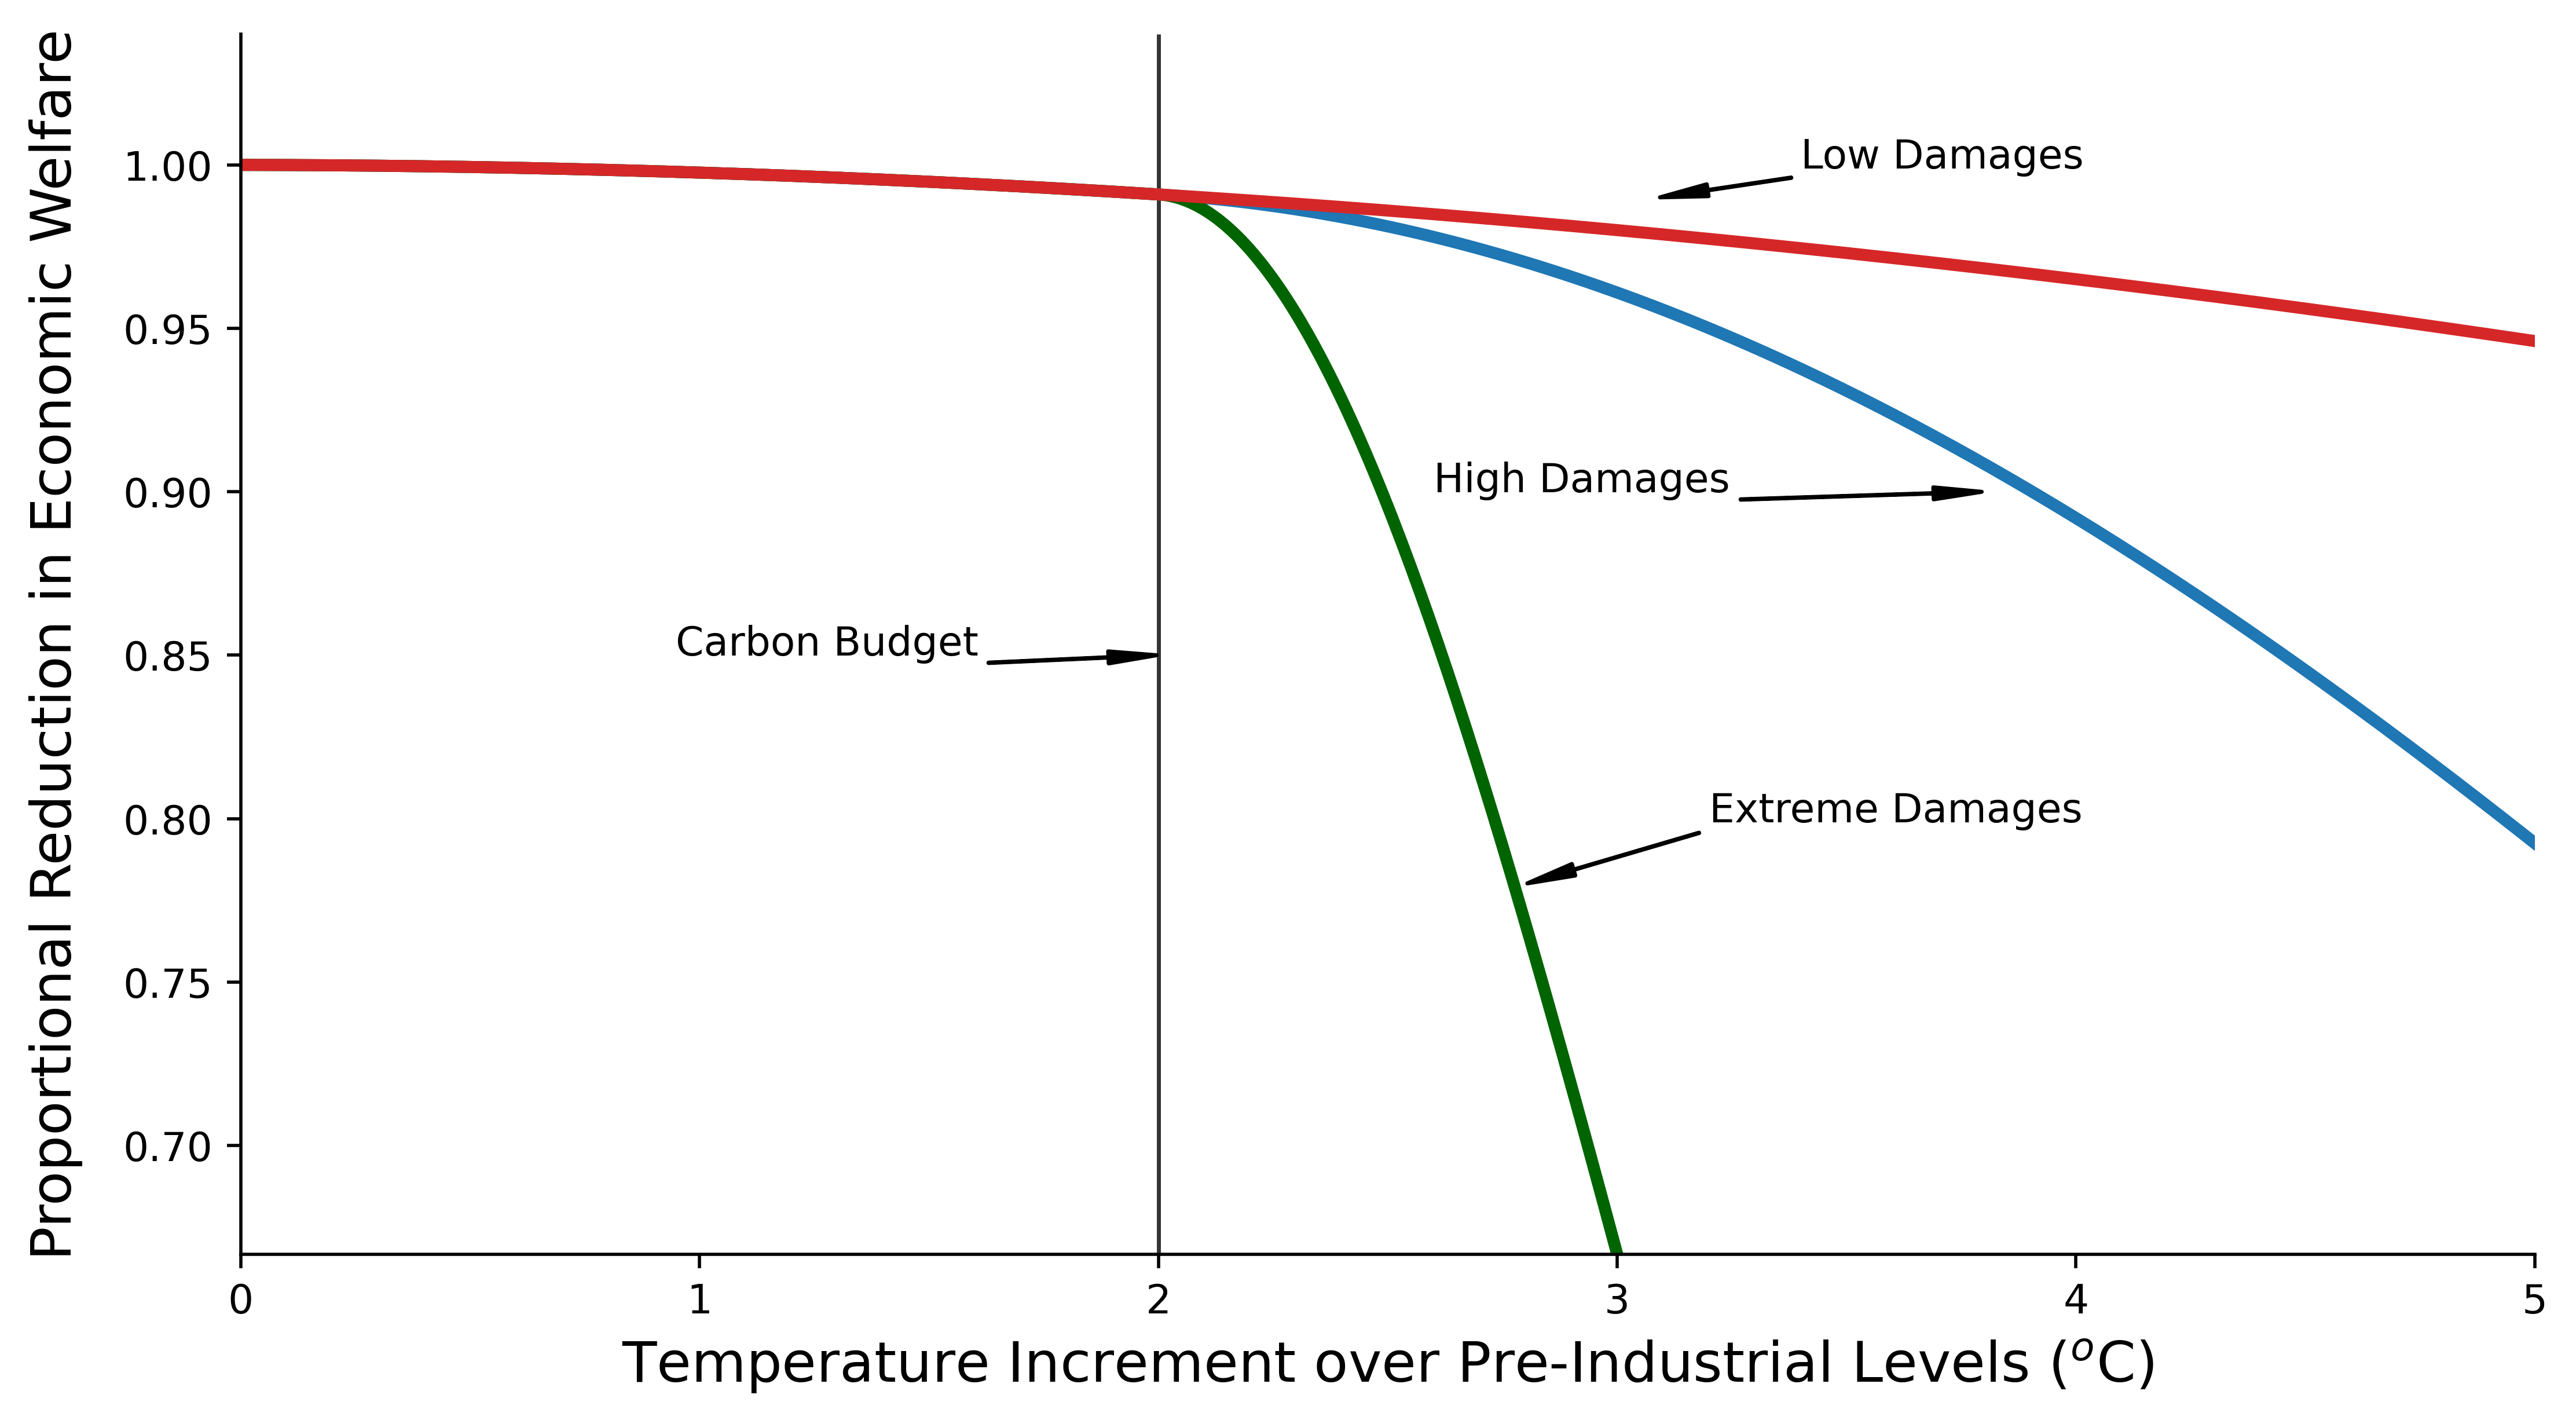

In [149]:
fig = plt.figure(figsize=(9,5),dpi=500)

plt.plot(y,dmg_high, color="tab:blue")
plt.plot(y,dmg_extreme, color="darkgreen")
plt.plot(y, dmg_low, color="tab:red")
plt.vlines(2, ymin=2/3, ymax=1.04, color="black", linewidth=1, alpha=0.8)
plt.xlim(0,5)
plt.ylim(2/3,1.04)
plt.xlabel('Temperature Increment over Pre-Industrial Levels ($^o$C)', fontsize=14)
plt.ylabel('Proportional Reduction in Economic Welfare', fontsize=14, labelpad=10)
plt.annotate('Low Damages', xy=(3.09, 0.99), xytext=(3.4, 0.999),
            arrowprops=dict(facecolor='black', shrink=0.01, width=0.1, headwidth=3), 
            )
plt.annotate('High Damages', xy=(3.8, 0.9), xytext=(2.6, 0.9),
            arrowprops=dict(facecolor='black', shrink=0.01, width=0.1, headwidth=3), 
            )
plt.annotate('Extreme Damages', xy=(2.8, 0.78), xytext=(3.2, 0.799),
            arrowprops=dict(facecolor='black', shrink=0.01, width=0.1, headwidth=3), 
            )
plt.annotate('Carbon Budget', xy=(2, 0.85), xytext=(-120, -0),textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.01, width=0.1, headwidth=3), 
            )
# plt.savefig("./paper_plots/damage_three.png", facecolor="w", bbox_inches="tight")

In [127]:
trace_low = go.Scatter(x = y, y = dmg_low, name = 'Low Damages', 
                     line = dict(width = 4), showlegend = False)
trace_high = go.Scatter(x = y, y = dmg_high, name = "High Damages", 
                     line = dict(width = 4, dash='dash', color = 'red'), showlegend = False)
trace_extreme = go.Scatter(x = y, y = dmg_extreme, name = "Extreme Damages", 
                     line = dict(width = 4, dash='dash', color = 'red'), showlegend = False)

annotations=[dict(x=3.6, y=.92, text="High Damages", textangle=0, ax=-100,
            ay=75, font=dict(color="black", size=16), arrowcolor="black",
            arrowsize=3, arrowwidth=1, arrowhead=1),
             
            dict(x=4, y=.965, text="Low Damages", textangle=0, ax=75,
            ay=-25, font=dict(color="black", size=16), arrowcolor="black",
            arrowsize=3, arrowwidth=1, arrowhead=1),
             
            dict(x=2, y=.85, text="Carbon Budget", textangle=0, ax=-100,
            ay=0, font=dict(color="black", size=16), arrowcolor="black",
            arrowsize=3, arrowwidth=1, arrowhead=1)]

layout = dict(#title = 'Economic Damage Uncertainty',
              #titlefont = dict(size = 32),

              xaxis = go.layout.XAxis(
                  title=go.layout.xaxis.Title(
                                text='Temperature Increment over Preindustrial Levels (˚C)', font=dict(size=24)),
                                     tickfont=dict(size=14), showgrid = False, showline = True),
              yaxis = go.layout.YAxis(
                  range=[2/3,1],
                  title=go.layout.yaxis.Title(
                                text='Proportional Reduction in Economic Welfare', font=dict(size=24)),
                                     tickfont=dict(size=14), showgrid = False),
              shapes = [dict(type = 'line', xref = 'x', yref = 'paper', x0 = 2, x1 = 2, y0 = 0, y1 = 1, line = dict(width = 2))],
              annotations = annotations,
    margin=dict(l=70, r=70, t=20, b=50)
              )

fig = dict(data = [trace_low, trace_high, trace_extreme], layout = layout)
iplot(fig)

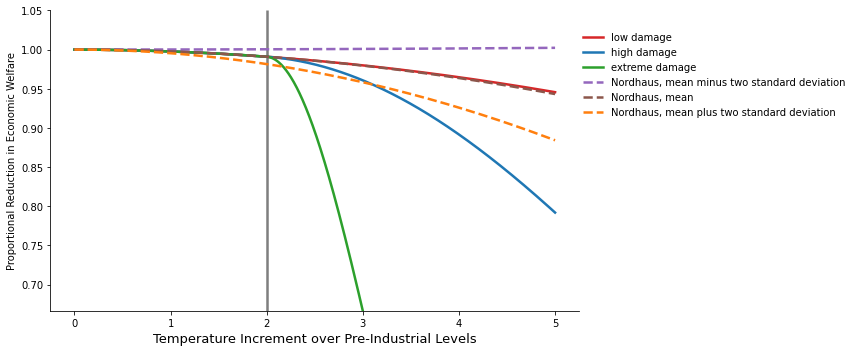

In [157]:
y_bar = 2.
γ_1 = 1.7675/10000
γ_2 = .0022*2
γ_3_low = 0
γ_3_high = .0197*2
γ_3_extreme = .3853*2
y_grid = np.linspace(0, 5, 1000)

damage_low = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_low/2.*(y_grid>y_bar)*(y_grid-y_bar)**2
damage_high = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_high/2.*(y_grid>y_bar)*(y_grid-y_bar)**2
damage_extreme = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_extreme/2.*(y_grid>y_bar)*(y_grid-y_bar)**2

# Compute Nordhaus damage
psi_mean = .00227
psi_std = .00118
damage_nordhaus_mean = 1. - psi_mean*y_grid**2
damage_nordhaus_plus = 1. - (psi_mean + 2*psi_std) * y_grid**2
damage_nordhaus_minus = 1. - (psi_mean - 2*psi_std) * y_grid**2

plt.figure(figsize=(12, 5))
plt.plot(y_grid, np.exp(-damage_low), linewidth=2.5, color='tab:red', label='low damage')
plt.plot(y_grid, np.exp(-damage_high), linewidth=2.5, color='tab:blue', label='high damage')
plt.plot(y_grid, np.exp(-damage_extreme), linewidth=2.5, color='tab:green', label='extreme damage')
plt.plot(y_grid, damage_nordhaus_minus, linewidth=2.5, color='tab:purple', linestyle='dashed', label='Nordhaus, mean minus two standard deviation')
plt.plot(y_grid, damage_nordhaus_mean, linewidth=2.5, color='tab:brown', linestyle='dashed', label='Nordhaus, mean')
plt.plot(y_grid, damage_nordhaus_plus, linewidth=2.5, color='tab:orange', linestyle='dashed', label='Nordhaus, mean plus two standard deviation')

plt.ylim(2./3, 1.05)
plt.vlines(2., ymin=2./3, ymax=1.05, color='tab:grey', linewidth=2.5)
plt.xlabel('Temperature Increment over Pre-Industrial Levels', fontsize=13)
plt.ylabel('Proportional Reduction in Economic Welfare')
plt.legend(frameon=False, loc=(1., .63))
# plt.savefig('./paper_plots/damage_plot.png', dpi=500, facecolor="w")

In [2]:
solu = pickle.load(open(data_dir + "solu_modified_v6_21*201_1000_0.00025_0226_15:49", "rb"))

In [3]:
solu["solution_v6"]['zGrid'][25]

0.00186

In [4]:
solu

{'A': array([[-0.01, -0.01, -0.01, ..., -0.01, -0.01, -0.01],
        [-0.01, -0.01, -0.01, ..., -0.01, -0.01, -0.01],
        [-0.01, -0.01, -0.01, ..., -0.01, -0.01, -0.01],
        ...,
        [-0.01, -0.01, -0.01, ..., -0.01, -0.01, -0.01],
        [-0.01, -0.01, -0.01, ..., -0.01, -0.01, -0.01],
        [-0.01, -0.01, -0.01, ..., -0.01, -0.01, -0.01]]),
 'B_y': array([[0.02225606, 0.02144378, 0.02050923, ..., 0.00013858, 0.00013681,
         0.00013509],
        [0.02225606, 0.02144378, 0.02050923, ..., 0.00013858, 0.00013681,
         0.00013509],
        [0.02225606, 0.02144378, 0.02050923, ..., 0.00013858, 0.00013681,
         0.00013509],
        ...,
        [0.02225609, 0.0214438 , 0.02050924, ..., 0.00013858, 0.00013681,
         0.00013509],
        [0.0222561 , 0.0214438 , 0.02050924, ..., 0.00013858, 0.00013681,
         0.00013509],
        [0.0222561 , 0.0214438 , 0.02050924, ..., 0.00013858, 0.00013681,
         0.00013509]]),
 'B_z': array([[ 3.00746849e-04,  3.0074

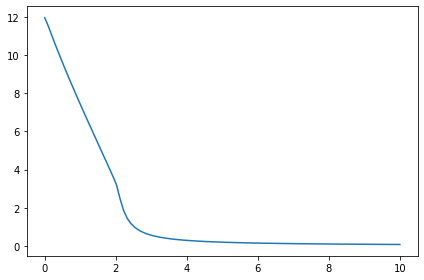

In [115]:
plt.plot(solu["solution_v6"]['yGrid'], solu["solution_v6"]['e'][25])

In [7]:
# global values
delta = .01
eta = .032
kappa = 7
invkap = .09
alpha = .115
phi = 6.67
alpha_k = -.043
sigma_k = .0085
sigma_c = .0085
K0 = 80/alpha

Social cost of carbon:
$$
    SCC^* = \cfrac{\eta (\alpha - i) ( k - n)}{(1 - \eta) e}
$$

Start with no volatility and no damage

In [8]:
# simulate K
def simulateLogCapital(alpha_k, invkap,sigma_k, k0, T=102, dt=1/4):
    periods = int(T/dt)
    logKt = np.zeros(periods)
    i = invkap
     # log capital
    logKt[ 0] = np.log(k0)
    logk = np.log(k0)
    for t in range(periods-1):
        logk +=   (alpha_k  + i - kappa/2*i**2 - .5*sigma_k**2)*dt
        logKt[t+1] = logk
    return logKt

In [9]:
logKt = simulateLogCapital(alpha_k, invkap, sigma_k, K0)

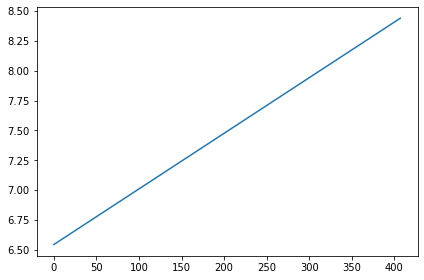

In [10]:
plt.plot(logKt)

In [11]:
def simulateEmission(Y, e, Z, zloc = 50, T=102, dt=1/4):
    periods = int(T/dt)
    et = np.zeros(periods)
    yt = np.zeros(periods)
    y = 290*Z[zloc]
    yt[0]= y
    for t in range(periods):
        et[t] = np.interp(y, Y, e)
#         et[t] = e[loc]
        y = y + et[t]*Z[zloc]*dt
        yt[t] = y
    return et, yt

In [12]:
et, yt = simulateEmission(solu["solution_v6"]['yGrid'], solu["solution_v6"]['e'][25], solu["solution_v6"]['zGrid'], zloc=25)

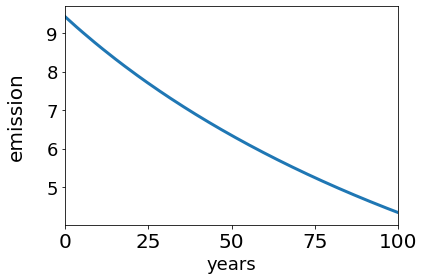

In [45]:
# plt.figure(figsize=(12,9))
plt.plot(et, linewidth=3)
plt.xticks(np.arange(0,408,100), np.arange(0,102,25), fontsize=20)
plt.xlabel('years', fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('emission', fontsize=20, labelpad=20)
plt.xlim(0,400)
# plt.ylim(0,900)
plt.xticks(np.arange(0,408,100), np.arange(0,102,25))
# plt.savefig(figDir + "ems_t.png")
plt.show()

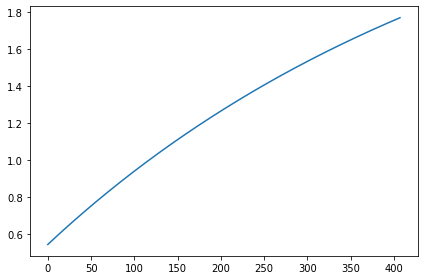

In [14]:
plt.plot(yt)

In [15]:
scc = eta*(alpha - invkap)*np.exp(logKt)/(1-eta)/et*1000

In [16]:
scc[0], scc[-1]

(60.90668729054059, 893.253054727152)

Text(0, 0.5, 'SCC')

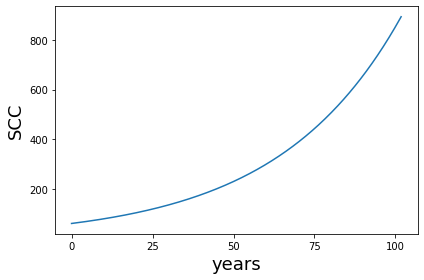

In [17]:
# plt.figure(figsize=(12,9))
plt.plot(scc)
# plt.plot(scc - baset/MU_c*1000)
plt.xticks(np.arange(0,408,100), np.arange(0,102,25))
plt.xlabel('years', fontsize=18)
plt.ylabel('SCC', fontsize=18)
# plt.savefig(figDir + "sccTotal.png")

In [18]:
v_n = 1-eta

In [19]:
solu.keys()

dict_keys(['A', 'B_y', 'B_z', 'C_yy', 'C_zz', 'D', 'FC_Err', 'PDE_Err', 'PDE_rhs', 'PIThis', '__annotations__', '__doc__', '__file__', '__name__', 'compute_start', 'dataFile', 'delta', 'dlambda', 'dmgDist', 'dmgDriftMat', 'dmgParDist', 'e', 'episode', 'epsilon', 'eta', 'gamma2p', 'gamma2pList', 'gamma2pMat', 'gamma2pProb', 'gamma_1', 'gamma_2', 'gamma_bar', 'gamma_high', 'gamma_low', 'hy', 'hz', 'i', 'modelParam', 'mu2', 'mu2Dist', 'mu2List', 'mu2ParDist', 'mu2Prob', 'mu2Var', 'my_shelf', 'numDmg', 'numy', 'numz', 'out_comp', 'prior', 'rho', 'sigma2', 'sigma_z', 'solution_v6', 'solve_start', 'start_time', 'stateSpace', 'time_store', 'tol', 'v0', 'v0_dy', 'v0_dyy', 'v0_dz', 'v0_dzz', 'v_n', 'vold', 'xi_a', 'xi_m', 'y', 'y_mat', 'y_max', 'y_min', 'z', 'z2_max', 'z2_min', 'zDriftMat', 'z_mat'])

In [100]:
v_n = solu['v_n']
xi_m = solu['xi_m']
xi_a = solu['xi_a']
# h2 = solu['h2']
ems = solu['e']
gamma_1 = solu['gamma_1']
gamma_2 = solu['gamma_2']
gamma2pMat = solu['gamma2pMat']
gamma_bar = solu['gamma_bar']
zGrid = solu['z']
yGrid = solu['y']
prior = solu['prior']
z_mat = solu['z_mat']
y_mat = solu['y_mat']
stateSpace = solu['stateSpace']
v0 = solu['v0']
hy = solu['hy']
hz = solu['hz']

In [21]:
np.sum(prior[:,0,0])

0.9999999999999997

In [22]:
A = solu['A']
B_z = solu['B_z']
B_y = solu['B_y']
C_zz = solu['C_zz']
C_yy = solu['C_yy']
D =  v_n*np.sum(prior*ddLambda(y_mat, 1, gamma_2, gamma2pMat, gamma_bar), axis=0)*z_mat**2*ems**2

In [23]:
out = PDESolver_2d(stateSpace, A, B_z, B_y, C_zz, C_yy, D, v0, ε = 1, tol = -10, smartguess = False, solverType = 'Feyman Kac')

In [24]:
V = out[2].reshape(v0.shape, order='F')
V

array([[-9.01893482e-05, -8.47133619e-05, -7.94819162e-05, ...,
         2.33082495e-06,  1.16858738e-06,  2.45474597e-06],
       [-9.01893144e-05, -8.47133404e-05, -7.94819315e-05, ...,
         2.33151441e-06,  1.16887498e-06,  2.45537953e-06],
       [-9.01892795e-05, -8.47133183e-05, -7.94819473e-05, ...,
         2.33222213e-06,  1.16917020e-06,  2.45602947e-06],
       ...,
       [-9.01825316e-05, -8.47073743e-05, -7.94830260e-05, ...,
         2.45693314e-06,  1.22101545e-06,  2.57024915e-06],
       [-9.01817969e-05, -8.47066130e-05, -7.94830186e-05, ...,
         2.47017201e-06,  1.22650815e-06,  2.58235955e-06],
       [-9.01809238e-05, -8.47056921e-05, -7.94829927e-05, ...,
         2.48589967e-06,  1.23303204e-06,  2.59674464e-06]])

In [25]:
ME_base = -V*z_mat - v_n*np.sum(prior*dLambda(y_mat, 1, gamma_1, gamma_2, gamma2pMat, gamma_bar), axis=0)*z_mat

In [26]:
ME_base

array([[4.31117525e-07, 1.13194881e-06, 1.83318360e-06, ...,
        5.48307949e-04, 5.55226630e-04, 5.62141271e-04],
       [4.33312249e-07, 1.13771143e-06, 1.84251619e-06, ...,
        5.51099333e-04, 5.58053237e-04, 5.65003080e-04],
       [4.35506971e-07, 1.14347404e-06, 1.85184879e-06, ...,
        5.53890718e-04, 5.60879845e-04, 5.67864889e-04],
       ...,
       [5.36452976e-07, 1.40854365e-06, 2.28114928e-06, ...,
        6.82294214e-04, 6.90903720e-04, 6.99507919e-04],
       [5.38646184e-07, 1.41430468e-06, 2.29048185e-06, ...,
        6.85085571e-04, 6.93730317e-04, 7.02369703e-04],
       [5.40839093e-07, 1.42006536e-06, 2.29981438e-06, ...,
        6.87876924e-04, 6.96556911e-04, 7.05231482e-04]])

In [27]:
def simulateBase(meBase, yt, Y, T=102, dt=1/4):
    periods = int(T/dt)
    baset = np.interp(yt, Y, meBase)
    return baset

In [28]:
baset = simulateBase(ME_base[25], yt, yGrid)
baset.shape

(408,)

In [29]:
MU_c = delta*(1-eta)/(alpha - invkap)/np.exp(logKt)

In [30]:
MU_c.shape

(408,)

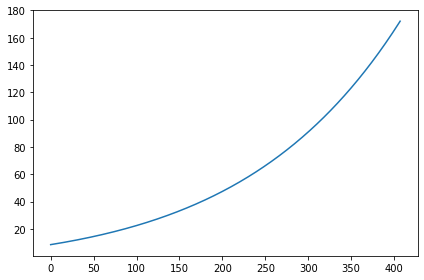

In [31]:
plt.plot(baset/MU_c*1000)

In [32]:
(baset/MU_c*1000)[-1]

172.1349110563784

(0.0, 900.0)

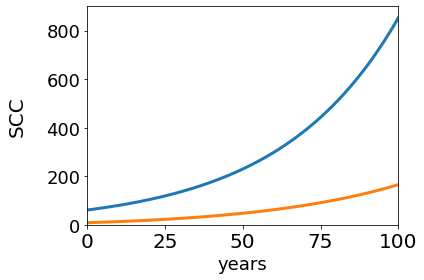

In [47]:
# plt.figure(figsize=(12,9))
plt.plot(scc, label=r"SCC: 144 models $ \times $ 3 damage functions", linewidth=3)
plt.plot(baset/MU_c*1000, label="$SCC^0$", linewidth=3)
# plt.legend(fontsize=20,loc=2)
plt.xticks(np.arange(0,408,100), np.arange(0,102,25), fontsize=20)
plt.xlabel('years', fontsize=18)
plt.yticks(np.arange(0, 900, 200), fontsize=18)
plt.ylabel('SCC', fontsize=20, labelpad=20)
plt.xlim(0,400)
plt.ylim(0,900)
# plt.savefig(figDir + "sccTotal.png")

In [48]:
from partitionfunctions import par_index_1type, par_index_2type

In [56]:
prior[:,0,0].shape

(432,)

In [62]:
modelParam = solu["modelParam"]
params_dist = np.hstack([modelParam.reshape((len(modelParam),2)), priorlist.reshape((len(modelParam), 1))])

In [88]:
# damage
n_d = 3
n_t = 16
n_c = 9

numz = solu['numz']
numy = solu['numy']

priorlist = prior[:,0,0]
d_idx = par_index_1type("damage", (16, 9, 3))

pi_l_0 = np.zeros((n_d, numz, numy))
for i in range(n_d):
    idx = d_idx[i]
    pi_l_0_i = prior[idx]
    pi_l_0[i] = np.sum(pi_l_0_i, axis=0)

modelmu2 = np.zeros((n_d, numz, numy))
modelgamma2p = np.zeros((n_d, numz, numy))
for i in range(n_d):
    dmg_id = d_idx[i]
    modelmu2_i = np.zeros(len(dmg_id))
    modelgamma2p_i = np.zeros(len(dmg_id)) 
    for j, param_prob in enumerate(params_dist[dmg_id]):
        mu2, gamma_2p, prob = param_prob
        modelmu2_i[j] = prob*mu2
        modelgamma2p_i[j] = prob*gamma_2p

    modelmu2[i] = np.sum(modelmu2_i)/pi_l_0[i]
    modelgamma2p[i] = np.sum(modelgamma2p_i)/pi_l_0[i]

In [91]:
modelParamNew = np.hstack([modelmu2[:,0,0].reshape((n_d,1)), modelgamma2p[:,0,0].reshape((n_d,1))])
modelParamNew

array([[0.00186195, 0.        ],
       [0.00186195, 0.0394    ],
       [0.00186195, 0.7706    ]])

In [95]:
dlambda = dLambda(y_mat, 1, gamma_1, gamma_2,modelgamma2p, gamma_bar)
dlambda.shape

(3, 51, 100)

In [108]:
rho = solu['rho']
sigma2 = solu['sigma2']
episode = 0
FC_err = 1
epsilon = .3
tol = 1e-8
v0 = solu['v0']
ems = delta*eta

start_time = time.time()
while FC_err > tol:
    v0.copy()
    # derivatives
    v0_dz = finiteDiff(v0, 0, 1, hz)
    v0_dzz = finiteDiff(v0, 0, 2, hz)
    v0_dy = finiteDiff(v0, 1, 1, hy)
    v0_dyy = finiteDiff(v0, 1, 2, hy)
    # update pi
    PIThis = weightPITemp(y_mat, z_mat, ems, pi_l_0, modelParamNew, v0_dz, rho, gamma_bar, v_n, xi_a, sigma2)
    dlambda = dLambda(y_mat, 1, gamma_1, gamma_2, modelgamma2p, gamma_bar)
    ems = (-delta*eta/(v0_dy*z_mat + v_n*np.sum(PIThis*dlambda, axis=0)*z_mat))*0.5 + ems*0.5
    zDriftMat =  zDrift(z_mat, modelParamNew, rho)
    # update coefficient
    A = -delta*np.ones(z_mat.shape)
    B_z = np.sum(PIThis*zDriftMat, axis=0)
    B_y = z_mat*ems
    C_zz = z_mat*sigma2**2/2
    C_yy = np.zeros(z_mat.shape)
    D = delta*eta*np.log(ems) + v_n*np.sum(PIThis*dlambda*z_mat*ems) + xi_a*relativeEntropy(PIThis, pi_l_0)
    # into the solver
    compute_start = time.time()
    out = PDESolver_2d(stateSpace, A, B_z, B_y, C_zz, C_yy, D, v0, epsilon, solverType="False Transient")
    out_comp = out[2].reshape(v0.shape, order="F")
    PDE_rhs = A*v0 + B_z*v0_dz + B_y*v0_dy + C_zz*v0_dzz + C_yy*v0_dyy + D
    PDE_err = np.max(abs(PDE_rhs))
    FC_err = np.max(abs((out_comp-v0)/epsilon))
    print("episode: {:d};\t PDE error: {:.10f};\t FC error: {:.10f};\t takes: {:.4f}".format(episode, PDE_err, FC_err, time.time()-compute_start))
    episode += 1
    v0 = out_comp

episode: 0; 	 PDE error: 0.5913560724; 	 FC error: 0.5895869264; 	 takes: 0.05
episode: 1; 	 PDE error: 5.3241634060; 	 FC error: 5.3082381622; 	 takes: 0.05
episode: 2; 	 PDE error: 2.9288210731; 	 FC error: 2.9200602958; 	 takes: 0.05
episode: 3; 	 PDE error: 1.4651725710; 	 FC error: 1.4607895803; 	 takes: 0.05
episode: 4; 	 PDE error: 1.2107874953; 	 FC error: 1.2071653628; 	 takes: 0.05
episode: 5; 	 PDE error: 1.2700266366; 	 FC error: 1.2662273185; 	 takes: 0.05
episode: 6; 	 PDE error: 1.2402825402; 	 FC error: 1.2365721954; 	 takes: 0.05
episode: 7; 	 PDE error: 1.2468967875; 	 FC error: 1.2431666682; 	 takes: 0.05
episode: 8; 	 PDE error: 1.2393606772; 	 FC error: 1.2356531110; 	 takes: 0.05
episode: 9; 	 PDE error: 1.2373507672; 	 FC error: 1.2336492360; 	 takes: 0.05
episode: 10; 	 PDE error: 1.2331409334; 	 FC error: 1.2294519759; 	 takes: 0.05
episode: 11; 	 PDE error: 1.2297872940; 	 FC error: 1.2261083780; 	 takes: 0.05
episode: 12; 	 PDE error: 1.2260996711; 	 FC error

episode: 105; 	 PDE error: 0.9332018004; 	 FC error: 0.9304102547; 	 takes: 0.04
episode: 106; 	 PDE error: 0.9304633261; 	 FC error: 0.9276799742; 	 takes: 0.05
episode: 107; 	 PDE error: 0.9277328577; 	 FC error: 0.9249576753; 	 takes: 0.04
episode: 108; 	 PDE error: 0.9250103727; 	 FC error: 0.9222433362; 	 takes: 0.04
episode: 109; 	 PDE error: 0.9222958495; 	 FC error: 0.9195370214; 	 takes: 0.04
episode: 110; 	 PDE error: 0.9195892785; 	 FC error: 0.9168385151; 	 takes: 0.04
episode: 111; 	 PDE error: 0.9168906191; 	 FC error: 0.9141479158; 	 takes: 0.04
episode: 112; 	 PDE error: 0.9141998546; 	 FC error: 0.9114651969; 	 takes: 0.04
episode: 113; 	 PDE error: 0.9115169644; 	 FC error: 0.9087903327; 	 takes: 0.04
episode: 114; 	 PDE error: 0.9088419270; 	 FC error: 0.9061232983; 	 takes: 0.04
episode: 115; 	 PDE error: 0.9061747301; 	 FC error: 0.9034640719; 	 takes: 0.04
episode: 116; 	 PDE error: 0.9035153405; 	 FC error: 0.9008126317; 	 takes: 0.04
episode: 117; 	 PDE error: 0

episode: 211; 	 PDE error: 0.6834873880; 	 FC error: 0.6814428487; 	 takes: 0.04
episode: 212; 	 PDE error: 0.6814846962; 	 FC error: 0.6794461480; 	 takes: 0.04
episode: 213; 	 PDE error: 0.6794879418; 	 FC error: 0.6774553671; 	 takes: 0.04
episode: 214; 	 PDE error: 0.6774971077; 	 FC error: 0.6754704888; 	 takes: 0.04
episode: 215; 	 PDE error: 0.6755121767; 	 FC error: 0.6734914958; 	 takes: 0.04
episode: 216; 	 PDE error: 0.6735331312; 	 FC error: 0.6715183708; 	 takes: 0.04
episode: 217; 	 PDE error: 0.6715599542; 	 FC error: 0.6695510967; 	 takes: 0.04
episode: 218; 	 PDE error: 0.6695926284; 	 FC error: 0.6675896563; 	 takes: 0.04
episode: 219; 	 PDE error: 0.6676311367; 	 FC error: 0.6656340326; 	 takes: 0.04
episode: 220; 	 PDE error: 0.6656754619; 	 FC error: 0.6636842083; 	 takes: 0.04
episode: 221; 	 PDE error: 0.6637255872; 	 FC error: 0.6617401666; 	 takes: 0.04
episode: 222; 	 PDE error: 0.6617814950; 	 FC error: 0.6598018903; 	 takes: 0.04
episode: 223; 	 PDE error: 0

episode: 314; 	 PDE error: 0.5054970499; 	 FC error: 0.5039849427; 	 takes: 0.04
episode: 315; 	 PDE error: 0.5040213668; 	 FC error: 0.5025136733; 	 takes: 0.04
episode: 316; 	 PDE error: 0.5025500283; 	 FC error: 0.5010467354; 	 takes: 0.04
episode: 317; 	 PDE error: 0.5010830207; 	 FC error: 0.4995841155; 	 takes: 0.04
episode: 318; 	 PDE error: 0.4996203305; 	 FC error: 0.4981258001; 	 takes: 0.04
episode: 319; 	 PDE error: 0.4981619442; 	 FC error: 0.4966718103; 	 takes: 0.04
episode: 320; 	 PDE error: 0.4967078490; 	 FC error: 0.4952220492; 	 takes: 0.04
episode: 321; 	 PDE error: 0.4952580401; 	 FC error: 0.4937765602; 	 takes: 0.04
episode: 322; 	 PDE error: 0.4938124899; 	 FC error: 0.4923353228; 	 takes: 0.04
episode: 323; 	 PDE error: 0.4923711866; 	 FC error: 0.4908983228; 	 takes: 0.04
episode: 324; 	 PDE error: 0.4909341183; 	 FC error: 0.4894655469; 	 takes: 0.04
episode: 325; 	 PDE error: 0.4895012721; 	 FC error: 0.4880369822; 	 takes: 0.04
episode: 326; 	 PDE error: 0

episode: 416; 	 PDE error: 0.3751757125; 	 FC error: 0.3740531918; 	 takes: 0.04
episode: 417; 	 PDE error: 0.3740793844; 	 FC error: 0.3729601420; 	 takes: 0.04
episode: 418; 	 PDE error: 0.3729862030; 	 FC error: 0.3718702295; 	 takes: 0.04
episode: 419; 	 PDE error: 0.3718961584; 	 FC error: 0.3707834443; 	 takes: 0.04
episode: 420; 	 PDE error: 0.3708092408; 	 FC error: 0.3696997769; 	 takes: 0.04
episode: 421; 	 PDE error: 0.3697254407; 	 FC error: 0.3686192176; 	 takes: 0.04
episode: 422; 	 PDE error: 0.3686447483; 	 FC error: 0.3675417566; 	 takes: 0.04
episode: 423; 	 PDE error: 0.3675671539; 	 FC error: 0.3664673845; 	 takes: 0.04
episode: 424; 	 PDE error: 0.3664926480; 	 FC error: 0.3653960916; 	 takes: 0.04
episode: 425; 	 PDE error: 0.3654212211; 	 FC error: 0.3643278685; 	 takes: 0.04
episode: 426; 	 PDE error: 0.3643528636; 	 FC error: 0.3632627056; 	 takes: 0.04
episode: 427; 	 PDE error: 0.3632875660; 	 FC error: 0.3622005935; 	 takes: 0.04
episode: 428; 	 PDE error: 0

episode: 518; 	 PDE error: 0.2780441726; 	 FC error: 0.2772120295; 	 takes: 0.04
episode: 519; 	 PDE error: 0.2772250101; 	 FC error: 0.2763955457; 	 takes: 0.03
episode: 520; 	 PDE error: 0.2764081146; 	 FC error: 0.2755810386; 	 takes: 0.03
episode: 521; 	 PDE error: 0.2755935778; 	 FC error: 0.2747688956; 	 takes: 0.03
episode: 522; 	 PDE error: 0.2747814177; 	 FC error: 0.2739590966; 	 takes: 0.04
episode: 523; 	 PDE error: 0.2739715651; 	 FC error: 0.2731516262; 	 takes: 0.03
episode: 524; 	 PDE error: 0.2731640162; 	 FC error: 0.2723464737; 	 takes: 0.04
episode: 525; 	 PDE error: 0.2723587732; 	 FC error: 0.2715436303; 	 takes: 0.04
episode: 526; 	 PDE error: 0.2715558335; 	 FC error: 0.2707430912; 	 takes: 0.03
episode: 527; 	 PDE error: 0.2707551924; 	 FC error: 0.2699448482; 	 takes: 0.03
episode: 528; 	 PDE error: 0.2699568443; 	 FC error: 0.2691488912; 	 takes: 0.04
episode: 529; 	 PDE error: 0.2691607832; 	 FC error: 0.2683552140; 	 takes: 0.04
episode: 530; 	 PDE error: 0

episode: 620; 	 PDE error: 0.2055425077; 	 FC error: 0.2049273612; 	 takes: 0.04
episode: 621; 	 PDE error: 0.2049326886; 	 FC error: 0.2043193077; 	 takes: 0.04
episode: 622; 	 PDE error: 0.2043246353; 	 FC error: 0.2037130430; 	 takes: 0.03
episode: 623; 	 PDE error: 0.2037183488; 	 FC error: 0.2031085577; 	 takes: 0.04
episode: 624; 	 PDE error: 0.2031138266; 	 FC error: 0.2025058443; 	 takes: 0.03
episode: 625; 	 PDE error: 0.2025110702; 	 FC error: 0.2019048917; 	 takes: 0.03
episode: 626; 	 PDE error: 0.2019100753; 	 FC error: 0.2013056958; 	 takes: 0.04
episode: 627; 	 PDE error: 0.2013108374; 	 FC error: 0.2007082520; 	 takes: 0.04
episode: 628; 	 PDE error: 0.2007133521; 	 FC error: 0.2001125555; 	 takes: 0.04
episode: 629; 	 PDE error: 0.2001176146; 	 FC error: 0.1995186017; 	 takes: 0.03
episode: 630; 	 PDE error: 0.1995236201; 	 FC error: 0.1989263857; 	 takes: 0.03
episode: 631; 	 PDE error: 0.1989313639; 	 FC error: 0.1983359026; 	 takes: 0.03
episode: 632; 	 PDE error: 0

episode: 722; 	 PDE error: 0.1517192614; 	 FC error: 0.1512651336; 	 takes: 0.03
episode: 723; 	 PDE error: 0.1512677129; 	 FC error: 0.1508149368; 	 takes: 0.03
episode: 724; 	 PDE error: 0.1508174997; 	 FC error: 0.1503660714; 	 takes: 0.03
episode: 725; 	 PDE error: 0.1503686181; 	 FC error: 0.1499185335; 	 takes: 0.03
episode: 726; 	 PDE error: 0.1499210641; 	 FC error: 0.1494723192; 	 takes: 0.03
episode: 727; 	 PDE error: 0.1494748339; 	 FC error: 0.1490274248; 	 takes: 0.04
episode: 728; 	 PDE error: 0.1490299237; 	 FC error: 0.1485838464; 	 takes: 0.03
episode: 729; 	 PDE error: 0.1485863297; 	 FC error: 0.1481415802; 	 takes: 0.03
episode: 730; 	 PDE error: 0.1481440480; 	 FC error: 0.1477006225; 	 takes: 0.03
episode: 731; 	 PDE error: 0.1477030748; 	 FC error: 0.1472609693; 	 takes: 0.03
episode: 732; 	 PDE error: 0.1472634065; 	 FC error: 0.1468226171; 	 takes: 0.03
episode: 733; 	 PDE error: 0.1468250391; 	 FC error: 0.1463855619; 	 takes: 0.04
episode: 734; 	 PDE error: 0

episode: 824; 	 PDE error: 0.1119184974; 	 FC error: 0.1115835067; 	 takes: 0.03
episode: 825; 	 PDE error: 0.1115849356; 	 FC error: 0.1112509434; 	 takes: 0.03
episode: 826; 	 PDE error: 0.1112523646; 	 FC error: 0.1109193679; 	 takes: 0.04
episode: 827; 	 PDE error: 0.1109207816; 	 FC error: 0.1105887773; 	 takes: 0.03
episode: 828; 	 PDE error: 0.1105901834; 	 FC error: 0.1102591687; 	 takes: 0.03
episode: 829; 	 PDE error: 0.1102605674; 	 FC error: 0.1099305393; 	 takes: 0.03
episode: 830; 	 PDE error: 0.1099319305; 	 FC error: 0.1096028861; 	 takes: 0.03
episode: 831; 	 PDE error: 0.1096042700; 	 FC error: 0.1092762063; 	 takes: 0.03
episode: 832; 	 PDE error: 0.1092775829; 	 FC error: 0.1089504971; 	 takes: 0.03
episode: 833; 	 PDE error: 0.1089518663; 	 FC error: 0.1086257554; 	 takes: 0.03
episode: 834; 	 PDE error: 0.1086271174; 	 FC error: 0.1083019786; 	 takes: 0.03
episode: 835; 	 PDE error: 0.1083033334; 	 FC error: 0.1079791637; 	 takes: 0.03
episode: 836; 	 PDE error: 0

episode: 926; 	 PDE error: 0.0825319508; 	 FC error: 0.0822846607; 	 takes: 0.03
episode: 927; 	 PDE error: 0.0822857742; 	 FC error: 0.0820392154; 	 takes: 0.04
episode: 928; 	 PDE error: 0.0820403352; 	 FC error: 0.0817991304; 	 takes: 0.03
episode: 929; 	 PDE error: 0.0817955807; 	 FC error: 0.0815532160; 	 takes: 0.03
episode: 930; 	 PDE error: 0.0815518349; 	 FC error: 0.0813087434; 	 takes: 0.03
episode: 931; 	 PDE error: 0.0813088875; 	 FC error: 0.0810655198; 	 takes: 0.03
episode: 932; 	 PDE error: 0.0810664580; 	 FC error: 0.0808233099; 	 takes: 0.03
episode: 933; 	 PDE error: 0.0808246599; 	 FC error: 0.0805819791; 	 takes: 0.03
episode: 934; 	 PDE error: 0.0805835477; 	 FC error: 0.0803414543; 	 takes: 0.03
episode: 935; 	 PDE error: 0.0803431441; 	 FC error: 0.0801016957; 	 takes: 0.03
episode: 936; 	 PDE error: 0.0801034567; 	 FC error: 0.0798626852; 	 takes: 0.03
episode: 937; 	 PDE error: 0.0798644885; 	 FC error: 0.0796244092; 	 takes: 0.03
episode: 938; 	 PDE error: 0

episode: 1028; 	 PDE error: 0.0608491315; 	 FC error: 0.0606660227; 	 takes: 0.03
episode: 1029; 	 PDE error: 0.0606675225; 	 FC error: 0.0604849601; 	 takes: 0.03
episode: 1030; 	 PDE error: 0.0604864546; 	 FC error: 0.0603044371; 	 takes: 0.03
episode: 1031; 	 PDE error: 0.0603059263; 	 FC error: 0.0601244521; 	 takes: 0.03
episode: 1032; 	 PDE error: 0.0601259361; 	 FC error: 0.0599450035; 	 takes: 0.03
episode: 1033; 	 PDE error: 0.0599464822; 	 FC error: 0.0597660897; 	 takes: 0.03
episode: 1034; 	 PDE error: 0.0597675632; 	 FC error: 0.0595877090; 	 takes: 0.03
episode: 1035; 	 PDE error: 0.0595891774; 	 FC error: 0.0594098601; 	 takes: 0.03
episode: 1036; 	 PDE error: 0.0594113230; 	 FC error: 0.0592325411; 	 takes: 0.03
episode: 1037; 	 PDE error: 0.0592339991; 	 FC error: 0.0590600381; 	 takes: 0.03
episode: 1038; 	 PDE error: 0.0590570923; 	 FC error: 0.0588822325; 	 takes: 0.03
episode: 1039; 	 PDE error: 0.0588812096; 	 FC error: 0.0587054497; 	 takes: 0.04
episode: 1040; 	

episode: 1131; 	 PDE error: 0.0447223336; 	 FC error: 0.0445870679; 	 takes: 0.03
episode: 1132; 	 PDE error: 0.0445887971; 	 FC error: 0.0444539352; 	 takes: 0.03
episode: 1133; 	 PDE error: 0.0444556587; 	 FC error: 0.0443211998; 	 takes: 0.03
episode: 1134; 	 PDE error: 0.0443229177; 	 FC error: 0.0441888604; 	 takes: 0.03
episode: 1135; 	 PDE error: 0.0441905727; 	 FC error: 0.0440569157; 	 takes: 0.03
episode: 1136; 	 PDE error: 0.0440586227; 	 FC error: 0.0439253648; 	 takes: 0.03
episode: 1137; 	 PDE error: 0.0439270665; 	 FC error: 0.0437942063; 	 takes: 0.03
episode: 1138; 	 PDE error: 0.0437959024; 	 FC error: 0.0436634391; 	 takes: 0.03
episode: 1139; 	 PDE error: 0.0436651299; 	 FC error: 0.0435330620; 	 takes: 0.03
episode: 1140; 	 PDE error: 0.0435347473; 	 FC error: 0.0434030739; 	 takes: 0.03
episode: 1141; 	 PDE error: 0.0434047539; 	 FC error: 0.0432734737; 	 takes: 0.03
episode: 1142; 	 PDE error: 0.0432751482; 	 FC error: 0.0431442601; 	 takes: 0.03
episode: 1143; 	

episode: 1236; 	 PDE error: 0.0326701785; 	 FC error: 0.0325709735; 	 takes: 0.03
episode: 1237; 	 PDE error: 0.0325725960; 	 FC error: 0.0324736802; 	 takes: 0.03
episode: 1238; 	 PDE error: 0.0324753043; 	 FC error: 0.0323766771; 	 takes: 0.03
episode: 1239; 	 PDE error: 0.0323783025; 	 FC error: 0.0322799631; 	 takes: 0.03
episode: 1240; 	 PDE error: 0.0322815900; 	 FC error: 0.0321835375; 	 takes: 0.03
episode: 1241; 	 PDE error: 0.0321851657; 	 FC error: 0.0320873992; 	 takes: 0.03
episode: 1242; 	 PDE error: 0.0320890289; 	 FC error: 0.0319915482; 	 takes: 0.03
episode: 1243; 	 PDE error: 0.0319931788; 	 FC error: 0.0318959827; 	 takes: 0.03
episode: 1244; 	 PDE error: 0.0318976145; 	 FC error: 0.0318007026; 	 takes: 0.03
episode: 1245; 	 PDE error: 0.0318023351; 	 FC error: 0.0317057066; 	 takes: 0.03
episode: 1246; 	 PDE error: 0.0317073400; 	 FC error: 0.0316115165; 	 takes: 0.03
episode: 1247; 	 PDE error: 0.0316126211; 	 FC error: 0.0315168931; 	 takes: 0.03
episode: 1248; 	

episode: 1341; 	 PDE error: 0.0238632405; 	 FC error: 0.0237901690; 	 takes: 0.03
episode: 1342; 	 PDE error: 0.0237919259; 	 FC error: 0.0237190731; 	 takes: 0.03
episode: 1343; 	 PDE error: 0.0237208239; 	 FC error: 0.0236481893; 	 takes: 0.03
episode: 1344; 	 PDE error: 0.0236499350; 	 FC error: 0.0235775169; 	 takes: 0.03
episode: 1345; 	 PDE error: 0.0235792572; 	 FC error: 0.0235070554; 	 takes: 0.03
episode: 1346; 	 PDE error: 0.0235087899; 	 FC error: 0.0234368040; 	 takes: 0.03
episode: 1347; 	 PDE error: 0.0234385320; 	 FC error: 0.0233667624; 	 takes: 0.03
episode: 1348; 	 PDE error: 0.0233684857; 	 FC error: 0.0232969298; 	 takes: 0.03
episode: 1349; 	 PDE error: 0.0232986479; 	 FC error: 0.0232273056; 	 takes: 0.03
episode: 1350; 	 PDE error: 0.0232290174; 	 FC error: 0.0231578893; 	 takes: 0.03
episode: 1351; 	 PDE error: 0.0231595961; 	 FC error: 0.0230886803; 	 takes: 0.03
episode: 1352; 	 PDE error: 0.0230903820; 	 FC error: 0.0230196779; 	 takes: 0.03
episode: 1353; 	

episode: 1446; 	 PDE error: 0.0174283863; 	 FC error: 0.0173746602; 	 takes: 0.03
episode: 1447; 	 PDE error: 0.0173763093; 	 FC error: 0.0173227391; 	 takes: 0.03
episode: 1448; 	 PDE error: 0.0173243878; 	 FC error: 0.0172709733; 	 takes: 0.03
episode: 1449; 	 PDE error: 0.0172726216; 	 FC error: 0.0172193622; 	 takes: 0.03
episode: 1450; 	 PDE error: 0.0172210100; 	 FC error: 0.0171679053; 	 takes: 0.03
episode: 1451; 	 PDE error: 0.0171695528; 	 FC error: 0.0171166023; 	 takes: 0.03
episode: 1452; 	 PDE error: 0.0171182492; 	 FC error: 0.0170654525; 	 takes: 0.03
episode: 1453; 	 PDE error: 0.0170670991; 	 FC error: 0.0170144557; 	 takes: 0.03
episode: 1454; 	 PDE error: 0.0170161018; 	 FC error: 0.0169636112; 	 takes: 0.03
episode: 1455; 	 PDE error: 0.0169652569; 	 FC error: 0.0169129187; 	 takes: 0.03
episode: 1456; 	 PDE error: 0.0169145641; 	 FC error: 0.0168623777; 	 takes: 0.03
episode: 1457; 	 PDE error: 0.0168640226; 	 FC error: 0.0168119877; 	 takes: 0.03
episode: 1458; 	

episode: 1547; 	 PDE error: 0.0128816809; 	 FC error: 0.0128415152; 	 takes: 0.03
episode: 1548; 	 PDE error: 0.0128431675; 	 FC error: 0.0128031176; 	 takes: 0.03
episode: 1549; 	 PDE error: 0.0128047694; 	 FC error: 0.0127648350; 	 takes: 0.03
episode: 1550; 	 PDE error: 0.0127664863; 	 FC error: 0.0127266671; 	 takes: 0.03
episode: 1551; 	 PDE error: 0.0127283179; 	 FC error: 0.0126886134; 	 takes: 0.03
episode: 1552; 	 PDE error: 0.0126902638; 	 FC error: 0.0126506737; 	 takes: 0.03
episode: 1553; 	 PDE error: 0.0126523236; 	 FC error: 0.0126128476; 	 takes: 0.03
episode: 1554; 	 PDE error: 0.0126144969; 	 FC error: 0.0125751348; 	 takes: 0.03
episode: 1555; 	 PDE error: 0.0125767837; 	 FC error: 0.0125375349; 	 takes: 0.03
episode: 1556; 	 PDE error: 0.0125391834; 	 FC error: 0.0125000477; 	 takes: 0.03
episode: 1557; 	 PDE error: 0.0125016956; 	 FC error: 0.0124626727; 	 takes: 0.03
episode: 1558; 	 PDE error: 0.0124643201; 	 FC error: 0.0124254096; 	 takes: 0.03
episode: 1559; 	

episode: 1651; 	 PDE error: 0.0094354919; 	 FC error: 0.0094056816; 	 takes: 0.03
episode: 1652; 	 PDE error: 0.0094072943; 	 FC error: 0.0093775686; 	 takes: 0.03
episode: 1653; 	 PDE error: 0.0093791809; 	 FC error: 0.0093495396; 	 takes: 0.03
episode: 1654; 	 PDE error: 0.0093511516; 	 FC error: 0.0093215945; 	 takes: 0.03
episode: 1655; 	 PDE error: 0.0093232061; 	 FC error: 0.0092937330; 	 takes: 0.03
episode: 1656; 	 PDE error: 0.0092953443; 	 FC error: 0.0092659549; 	 takes: 0.03
episode: 1657; 	 PDE error: 0.0092675657; 	 FC error: 0.0092382598; 	 takes: 0.03
episode: 1658; 	 PDE error: 0.0092398703; 	 FC error: 0.0092106476; 	 takes: 0.03
episode: 1659; 	 PDE error: 0.0092122577; 	 FC error: 0.0091868507; 	 takes: 0.03
episode: 1660; 	 PDE error: 0.0091858047; 	 FC error: 0.0091579427; 	 takes: 0.03
episode: 1661; 	 PDE error: 0.0091574607; 	 FC error: 0.0091298230; 	 takes: 0.03
episode: 1662; 	 PDE error: 0.0091302328; 	 FC error: 0.0091022228; 	 takes: 0.03
episode: 1663; 	

episode: 1755; 	 PDE error: 0.0069113872; 	 FC error: 0.0068890979; 	 takes: 0.03
episode: 1756; 	 PDE error: 0.0068907190; 	 FC error: 0.0068684923; 	 takes: 0.03
episode: 1757; 	 PDE error: 0.0068701127; 	 FC error: 0.0068479485; 	 takes: 0.03
episode: 1758; 	 PDE error: 0.0068495684; 	 FC error: 0.0068274665; 	 takes: 0.02
episode: 1759; 	 PDE error: 0.0068290857; 	 FC error: 0.0068070459; 	 takes: 0.03
episode: 1760; 	 PDE error: 0.0068086646; 	 FC error: 0.0067866866; 	 takes: 0.03
episode: 1761; 	 PDE error: 0.0067883048; 	 FC error: 0.0067663885; 	 takes: 0.03
episode: 1762; 	 PDE error: 0.0067680061; 	 FC error: 0.0067461513; 	 takes: 0.03
episode: 1763; 	 PDE error: 0.0067477684; 	 FC error: 0.0067259749; 	 takes: 0.03
episode: 1764; 	 PDE error: 0.0067275915; 	 FC error: 0.0067058591; 	 takes: 0.03
episode: 1765; 	 PDE error: 0.0067074750; 	 FC error: 0.0066858036; 	 takes: 0.03
episode: 1766; 	 PDE error: 0.0066874190; 	 FC error: 0.0066658083; 	 takes: 0.02
episode: 1767; 	

episode: 1859; 	 PDE error: 0.0050625136; 	 FC error: 0.0050458042; 	 takes: 0.03
episode: 1860; 	 PDE error: 0.0050473886; 	 FC error: 0.0050307247; 	 takes: 0.03
episode: 1861; 	 PDE error: 0.0050323089; 	 FC error: 0.0050156904; 	 takes: 0.03
episode: 1862; 	 PDE error: 0.0050172743; 	 FC error: 0.0050007010; 	 takes: 0.02
episode: 1863; 	 PDE error: 0.0050022848; 	 FC error: 0.0049857566; 	 takes: 0.02
episode: 1864; 	 PDE error: 0.0049873401; 	 FC error: 0.0049708568; 	 takes: 0.03
episode: 1865; 	 PDE error: 0.0049724401; 	 FC error: 0.0049560017; 	 takes: 0.03
episode: 1866; 	 PDE error: 0.0049575847; 	 FC error: 0.0049411910; 	 takes: 0.02
episode: 1867; 	 PDE error: 0.0049427738; 	 FC error: 0.0049264247; 	 takes: 0.03
episode: 1868; 	 PDE error: 0.0049280072; 	 FC error: 0.0049117025; 	 takes: 0.02
episode: 1869; 	 PDE error: 0.0049132848; 	 FC error: 0.0048970244; 	 takes: 0.03
episode: 1870; 	 PDE error: 0.0048986065; 	 FC error: 0.0048823903; 	 takes: 0.02
episode: 1871; 	

episode: 1963; 	 PDE error: 0.0037089898; 	 FC error: 0.0036963327; 	 takes: 0.03
episode: 1964; 	 PDE error: 0.0036979126; 	 FC error: 0.0036852887; 	 takes: 0.02
episode: 1965; 	 PDE error: 0.0036868684; 	 FC error: 0.0036742778; 	 takes: 0.03
episode: 1966; 	 PDE error: 0.0036758574; 	 FC error: 0.0036632997; 	 takes: 0.02
episode: 1967; 	 PDE error: 0.0036648791; 	 FC error: 0.0036523544; 	 takes: 0.03
episode: 1968; 	 PDE error: 0.0036539337; 	 FC error: 0.0036414418; 	 takes: 0.02
episode: 1969; 	 PDE error: 0.0036430210; 	 FC error: 0.0036305619; 	 takes: 0.02
episode: 1970; 	 PDE error: 0.0036321410; 	 FC error: 0.0036197145; 	 takes: 0.03
episode: 1971; 	 PDE error: 0.0036212934; 	 FC error: 0.0036088995; 	 takes: 0.02
episode: 1972; 	 PDE error: 0.0036104783; 	 FC error: 0.0035981168; 	 takes: 0.02
episode: 1973; 	 PDE error: 0.0035996955; 	 FC error: 0.0035873664; 	 takes: 0.02
episode: 1974; 	 PDE error: 0.0035889449; 	 FC error: 0.0035766481; 	 takes: 0.03
episode: 1975; 	

episode: 2068; 	 PDE error: 0.0027096011; 	 FC error: 0.0026999494; 	 takes: 0.02
episode: 2069; 	 PDE error: 0.0027015137; 	 FC error: 0.0026918864; 	 takes: 0.02
episode: 2070; 	 PDE error: 0.0026934505; 	 FC error: 0.0026838474; 	 takes: 0.03
episode: 2071; 	 PDE error: 0.0026854113; 	 FC error: 0.0026758323; 	 takes: 0.02
episode: 2072; 	 PDE error: 0.0026773961; 	 FC error: 0.0026692253; 	 takes: 0.02
episode: 2073; 	 PDE error: 0.0026694280; 	 FC error: 0.0026606876; 	 takes: 0.02
episode: 2074; 	 PDE error: 0.0026614846; 	 FC error: 0.0026523883; 	 takes: 0.02
episode: 2075; 	 PDE error: 0.0026535617; 	 FC error: 0.0026442788; 	 takes: 0.02
episode: 2076; 	 PDE error: 0.0026456573; 	 FC error: 0.0026362822; 	 takes: 0.02
episode: 2077; 	 PDE error: 0.0026377742; 	 FC error: 0.0026283562; 	 takes: 0.02
episode: 2078; 	 PDE error: 0.0026299104; 	 FC error: 0.0026204796; 	 takes: 0.02
episode: 2079; 	 PDE error: 0.0026220671; 	 FC error: 0.0026126513; 	 takes: 0.02
episode: 2080; 	

episode: 2173; 	 PDE error: 0.0019800234; 	 FC error: 0.0019725393; 	 takes: 0.02
episode: 2174; 	 PDE error: 0.0019741188; 	 FC error: 0.0019666523; 	 takes: 0.02
episode: 2175; 	 PDE error: 0.0019682318; 	 FC error: 0.0019607830; 	 takes: 0.02
episode: 2176; 	 PDE error: 0.0019623624; 	 FC error: 0.0019549312; 	 takes: 0.02
episode: 2177; 	 PDE error: 0.0019565105; 	 FC error: 0.0019490969; 	 takes: 0.02
episode: 2178; 	 PDE error: 0.0019506762; 	 FC error: 0.0019432801; 	 takes: 0.02
episode: 2179; 	 PDE error: 0.0019448593; 	 FC error: 0.0019374807; 	 takes: 0.02
episode: 2180; 	 PDE error: 0.0019390599; 	 FC error: 0.0019316987; 	 takes: 0.02
episode: 2181; 	 PDE error: 0.0019332778; 	 FC error: 0.0019259340; 	 takes: 0.02
episode: 2182; 	 PDE error: 0.0019275130; 	 FC error: 0.0019201865; 	 takes: 0.02
episode: 2183; 	 PDE error: 0.0019217655; 	 FC error: 0.0019144562; 	 takes: 0.02
episode: 2184; 	 PDE error: 0.0019160351; 	 FC error: 0.0019087430; 	 takes: 0.03
episode: 2185; 	

episode: 2273; 	 PDE error: 0.0014694672; 	 FC error: 0.0014634046; 	 takes: 0.02
episode: 2274; 	 PDE error: 0.0014650860; 	 FC error: 0.0014590354; 	 takes: 0.02
episode: 2275; 	 PDE error: 0.0014607174; 	 FC error: 0.0014546788; 	 takes: 0.02
episode: 2276; 	 PDE error: 0.0014563615; 	 FC error: 0.0014503349; 	 takes: 0.02
episode: 2277; 	 PDE error: 0.0014520182; 	 FC error: 0.0014460036; 	 takes: 0.02
episode: 2278; 	 PDE error: 0.0014476876; 	 FC error: 0.0014416850; 	 takes: 0.02
episode: 2279; 	 PDE error: 0.0014433695; 	 FC error: 0.0014373790; 	 takes: 0.02
episode: 2280; 	 PDE error: 0.0014390641; 	 FC error: 0.0014330856; 	 takes: 0.02
episode: 2281; 	 PDE error: 0.0014347712; 	 FC error: 0.0014288047; 	 takes: 0.02
episode: 2282; 	 PDE error: 0.0014304909; 	 FC error: 0.0014245365; 	 takes: 0.02
episode: 2283; 	 PDE error: 0.0014262231; 	 FC error: 0.0014202808; 	 takes: 0.02
episode: 2284; 	 PDE error: 0.0014219678; 	 FC error: 0.0014160376; 	 takes: 0.02
episode: 2285; 	

episode: 2375; 	 PDE error: 0.0010835072; 	 FC error: 0.0010788706; 	 takes: 0.02
episode: 2376; 	 PDE error: 0.0010802695; 	 FC error: 0.0010774499; 	 takes: 0.02
episode: 2377; 	 PDE error: 0.0010770685; 	 FC error: 0.0010724751; 	 takes: 0.02
episode: 2378; 	 PDE error: 0.0010738486; 	 FC error: 0.0010709414; 	 takes: 0.02
episode: 2379; 	 PDE error: 0.0010706651; 	 FC error: 0.0010660998; 	 takes: 0.02
episode: 2380; 	 PDE error: 0.0010674633; 	 FC error: 0.0010645305; 	 takes: 0.02
episode: 2381; 	 PDE error: 0.0010642981; 	 FC error: 0.0010607032; 	 takes: 0.02
episode: 2382; 	 PDE error: 0.0010611387; 	 FC error: 0.0010570299; 	 takes: 0.02
episode: 2383; 	 PDE error: 0.0010579848; 	 FC error: 0.0010535764; 	 takes: 0.02
episode: 2384; 	 PDE error: 0.0010548397; 	 FC error: 0.0010502653; 	 takes: 0.02
episode: 2385; 	 PDE error: 0.0010517031; 	 FC error: 0.0010470383; 	 takes: 0.02
episode: 2386; 	 PDE error: 0.0010485749; 	 FC error: 0.0010438691; 	 takes: 0.02
episode: 2387; 	

episode: 2475; 	 PDE error: 0.0008038248; 	 FC error: 0.0007998212; 	 takes: 0.02
episode: 2476; 	 PDE error: 0.0008014286; 	 FC error: 0.0007974326; 	 takes: 0.02
episode: 2477; 	 PDE error: 0.0007990397; 	 FC error: 0.0007950511; 	 takes: 0.02
episode: 2478; 	 PDE error: 0.0007966579; 	 FC error: 0.0007964958; 	 takes: 0.02
episode: 2479; 	 PDE error: 0.0007953579; 	 FC error: 0.0007927708; 	 takes: 0.02
episode: 2480; 	 PDE error: 0.0007920629; 	 FC error: 0.0007894891; 	 takes: 0.02
episode: 2481; 	 PDE error: 0.0007896728; 	 FC error: 0.0007862046; 	 takes: 0.02
episode: 2482; 	 PDE error: 0.0007873587; 	 FC error: 0.0007857064; 	 takes: 0.02
episode: 2483; 	 PDE error: 0.0007849542; 	 FC error: 0.0007821313; 	 takes: 0.02
episode: 2484; 	 PDE error: 0.0007826613; 	 FC error: 0.0007793459; 	 takes: 0.02
episode: 2485; 	 PDE error: 0.0007803542; 	 FC error: 0.0007770364; 	 takes: 0.02
episode: 2486; 	 PDE error: 0.0007780503; 	 FC error: 0.0007760549; 	 takes: 0.02
episode: 2487; 	

episode: 2580; 	 PDE error: 0.0005877431; 	 FC error: 0.0005843351; 	 takes: 0.02
episode: 2581; 	 PDE error: 0.0005859936; 	 FC error: 0.0005825917; 	 takes: 0.02
episode: 2582; 	 PDE error: 0.0005842490; 	 FC error: 0.0005808520; 	 takes: 0.02
episode: 2583; 	 PDE error: 0.0005825095; 	 FC error: 0.0005791183; 	 takes: 0.02
episode: 2584; 	 PDE error: 0.0005807754; 	 FC error: 0.0005773893; 	 takes: 0.02
episode: 2585; 	 PDE error: 0.0005790464; 	 FC error: 0.0005756661; 	 takes: 0.02
episode: 2586; 	 PDE error: 0.0005773226; 	 FC error: 0.0005739489; 	 takes: 0.02
episode: 2587; 	 PDE error: 0.0005756041; 	 FC error: 0.0005722356; 	 takes: 0.02
episode: 2588; 	 PDE error: 0.0005738904; 	 FC error: 0.0005705272; 	 takes: 0.02
episode: 2589; 	 PDE error: 0.0005721823; 	 FC error: 0.0005688241; 	 takes: 0.02
episode: 2590; 	 PDE error: 0.0005704789; 	 FC error: 0.0005671266; 	 takes: 0.02
episode: 2591; 	 PDE error: 0.0005687811; 	 FC error: 0.0005654348; 	 takes: 0.02
episode: 2592; 	

episode: 2682; 	 PDE error: 0.0004342556; 	 FC error: 0.0004313128; 	 takes: 0.02
episode: 2683; 	 PDE error: 0.0004329732; 	 FC error: 0.0004300328; 	 takes: 0.02
episode: 2684; 	 PDE error: 0.0004316936; 	 FC error: 0.0004287520; 	 takes: 0.02
episode: 2685; 	 PDE error: 0.0004304140; 	 FC error: 0.0004274882; 	 takes: 0.02
episode: 2686; 	 PDE error: 0.0004291481; 	 FC error: 0.0004262183; 	 takes: 0.02
episode: 2687; 	 PDE error: 0.0004278810; 	 FC error: 0.0004249547; 	 takes: 0.02
episode: 2688; 	 PDE error: 0.0004266161; 	 FC error: 0.0004236916; 	 takes: 0.02
episode: 2689; 	 PDE error: 0.0004253526; 	 FC error: 0.0004224415; 	 takes: 0.02
episode: 2690; 	 PDE error: 0.0004240991; 	 FC error: 0.0004211887; 	 takes: 0.02
episode: 2691; 	 PDE error: 0.0004228479; 	 FC error: 0.0004199389; 	 takes: 0.02
episode: 2692; 	 PDE error: 0.0004215974; 	 FC error: 0.0004186892; 	 takes: 0.02
episode: 2693; 	 PDE error: 0.0004203479; 	 FC error: 0.0004174454; 	 takes: 0.02
episode: 2694; 	

episode: 2789; 	 PDE error: 0.0003163300; 	 FC error: 0.0003137593; 	 takes: 0.02
episode: 2790; 	 PDE error: 0.0003153954; 	 FC error: 0.0003128253; 	 takes: 0.02
episode: 2791; 	 PDE error: 0.0003144623; 	 FC error: 0.0003118989; 	 takes: 0.02
episode: 2792; 	 PDE error: 0.0003135287; 	 FC error: 0.0003109677; 	 takes: 0.02
episode: 2793; 	 PDE error: 0.0003126041; 	 FC error: 0.0003100447; 	 takes: 0.02
episode: 2794; 	 PDE error: 0.0003116781; 	 FC error: 0.0003091224; 	 takes: 0.02
episode: 2795; 	 PDE error: 0.0003107548; 	 FC error: 0.0003082034; 	 takes: 0.02
episode: 2796; 	 PDE error: 0.0003098363; 	 FC error: 0.0003072855; 	 takes: 0.02
episode: 2797; 	 PDE error: 0.0003089203; 	 FC error: 0.0003063744; 	 takes: 0.02
episode: 2798; 	 PDE error: 0.0003080035; 	 FC error: 0.0003054617; 	 takes: 0.02
episode: 2799; 	 PDE error: 0.0003070945; 	 FC error: 0.0003045538; 	 takes: 0.02
episode: 2800; 	 PDE error: 0.0003061720; 	 FC error: 0.0003036476; 	 takes: 0.02
episode: 2801; 	

episode: 2896; 	 PDE error: 0.0002304360; 	 FC error: 0.0002282374; 	 takes: 0.02
episode: 2897; 	 PDE error: 0.0002297529; 	 FC error: 0.0002275189; 	 takes: 0.02
episode: 2898; 	 PDE error: 0.0002290710; 	 FC error: 0.0002268228; 	 takes: 0.02
episode: 2899; 	 PDE error: 0.0002283979; 	 FC error: 0.0002262505; 	 takes: 0.02
episode: 2900; 	 PDE error: 0.0002277251; 	 FC error: 0.0002254904; 	 takes: 0.02
episode: 2901; 	 PDE error: 0.0002270503; 	 FC error: 0.0002248088; 	 takes: 0.02
episode: 2902; 	 PDE error: 0.0002263796; 	 FC error: 0.0002242725; 	 takes: 0.02
episode: 2903; 	 PDE error: 0.0002257136; 	 FC error: 0.0002234741; 	 takes: 0.02
episode: 2904; 	 PDE error: 0.0002250528; 	 FC error: 0.0002228053; 	 takes: 0.02
episode: 2905; 	 PDE error: 0.0002243813; 	 FC error: 0.0002221577; 	 takes: 0.02
episode: 2906; 	 PDE error: 0.0002237253; 	 FC error: 0.0002214803; 	 takes: 0.02
episode: 2907; 	 PDE error: 0.0002230580; 	 FC error: 0.0002208213; 	 takes: 0.02
episode: 2908; 	

episode: 3006; 	 PDE error: 0.0001671273; 	 FC error: 0.0001650315; 	 takes: 0.01
episode: 3007; 	 PDE error: 0.0001664413; 	 FC error: 0.0001645268; 	 takes: 0.01
episode: 3008; 	 PDE error: 0.0001672822; 	 FC error: 0.0001639296; 	 takes: 0.01
episode: 3009; 	 PDE error: 0.0001676069; 	 FC error: 0.0001633766; 	 takes: 0.01
episode: 3010; 	 PDE error: 0.0001675179; 	 FC error: 0.0001628540; 	 takes: 0.02
episode: 3011; 	 PDE error: 0.0001672365; 	 FC error: 0.0001623393; 	 takes: 0.01
episode: 3012; 	 PDE error: 0.0001668567; 	 FC error: 0.0001618369; 	 takes: 0.01
episode: 3013; 	 PDE error: 0.0001664351; 	 FC error: 0.0001613515; 	 takes: 0.01
episode: 3014; 	 PDE error: 0.0001659410; 	 FC error: 0.0001608633; 	 takes: 0.02
episode: 3015; 	 PDE error: 0.0001654664; 	 FC error: 0.0001603832; 	 takes: 0.01
episode: 3016; 	 PDE error: 0.0001649877; 	 FC error: 0.0001599434; 	 takes: 0.01
episode: 3017; 	 PDE error: 0.0001645135; 	 FC error: 0.0001594315; 	 takes: 0.02
episode: 3018; 	

episode: 3110; 	 PDE error: 0.0001244665; 	 FC error: 0.0001206551; 	 takes: 0.02
episode: 3111; 	 PDE error: 0.0001240967; 	 FC error: 0.0001202843; 	 takes: 0.01
episode: 3112; 	 PDE error: 0.0001237204; 	 FC error: 0.0001199458; 	 takes: 0.01
episode: 3113; 	 PDE error: 0.0001233591; 	 FC error: 0.0001195651; 	 takes: 0.01
episode: 3114; 	 PDE error: 0.0001229813; 	 FC error: 0.0001192163; 	 takes: 0.01
episode: 3115; 	 PDE error: 0.0001226158; 	 FC error: 0.0001188526; 	 takes: 0.02
episode: 3116; 	 PDE error: 0.0001222485; 	 FC error: 0.0001185159; 	 takes: 0.02
episode: 3117; 	 PDE error: 0.0001218879; 	 FC error: 0.0001181490; 	 takes: 0.01
episode: 3118; 	 PDE error: 0.0001215001; 	 FC error: 0.0001178812; 	 takes: 0.01
episode: 3119; 	 PDE error: 0.0001211348; 	 FC error: 0.0001174913; 	 takes: 0.01
episode: 3120; 	 PDE error: 0.0001208413; 	 FC error: 0.0001173053; 	 takes: 0.01
episode: 3121; 	 PDE error: 0.0001205942; 	 FC error: 0.0001168304; 	 takes: 0.01
episode: 3122; 	

episode: 3220; 	 PDE error: 0.0000895375; 	 FC error: 0.0000867338; 	 takes: 0.01
episode: 3221; 	 PDE error: 0.0000893117; 	 FC error: 0.0000864784; 	 takes: 0.01
episode: 3222; 	 PDE error: 0.0000890020; 	 FC error: 0.0000862347; 	 takes: 0.01
episode: 3223; 	 PDE error: 0.0000887796; 	 FC error: 0.0000859742; 	 takes: 0.01
episode: 3224; 	 PDE error: 0.0000884598; 	 FC error: 0.0000857398; 	 takes: 0.01
episode: 3225; 	 PDE error: 0.0000882435; 	 FC error: 0.0000854746; 	 takes: 0.01
episode: 3226; 	 PDE error: 0.0000879171; 	 FC error: 0.0000852444; 	 takes: 0.01
episode: 3227; 	 PDE error: 0.0000877114; 	 FC error: 0.0000849794; 	 takes: 0.01
episode: 3228; 	 PDE error: 0.0000874400; 	 FC error: 0.0000847383; 	 takes: 0.01
episode: 3229; 	 PDE error: 0.0000871742; 	 FC error: 0.0000844753; 	 takes: 0.01
episode: 3230; 	 PDE error: 0.0000869054; 	 FC error: 0.0000842369; 	 takes: 0.01
episode: 3231; 	 PDE error: 0.0000866102; 	 FC error: 0.0000839677; 	 takes: 0.01
episode: 3232; 	

episode: 3332; 	 PDE error: 0.0000638610; 	 FC error: 0.0000619521; 	 takes: 0.01
episode: 3333; 	 PDE error: 0.0000636455; 	 FC error: 0.0000617647; 	 takes: 0.01
episode: 3334; 	 PDE error: 0.0000634829; 	 FC error: 0.0000615879; 	 takes: 0.01
episode: 3335; 	 PDE error: 0.0000632738; 	 FC error: 0.0000614274; 	 takes: 0.01
episode: 3336; 	 PDE error: 0.0000630855; 	 FC error: 0.0000612085; 	 takes: 0.01
episode: 3337; 	 PDE error: 0.0000629197; 	 FC error: 0.0000610369; 	 takes: 0.01
episode: 3338; 	 PDE error: 0.0000627253; 	 FC error: 0.0000608552; 	 takes: 0.01
episode: 3339; 	 PDE error: 0.0000624985; 	 FC error: 0.0000606957; 	 takes: 0.01
episode: 3340; 	 PDE error: 0.0000623233; 	 FC error: 0.0000604831; 	 takes: 0.01
episode: 3341; 	 PDE error: 0.0000621619; 	 FC error: 0.0000603076; 	 takes: 0.01
episode: 3342; 	 PDE error: 0.0000619673; 	 FC error: 0.0000601283; 	 takes: 0.01
episode: 3343; 	 PDE error: 0.0000617512; 	 FC error: 0.0000599644; 	 takes: 0.01
episode: 3344; 	

episode: 3444; 	 PDE error: 0.0000458485; 	 FC error: 0.0000442017; 	 takes: 0.01
episode: 3445; 	 PDE error: 0.0000457156; 	 FC error: 0.0000440875; 	 takes: 0.01
episode: 3446; 	 PDE error: 0.0000455820; 	 FC error: 0.0000439365; 	 takes: 0.01
episode: 3447; 	 PDE error: 0.0000454486; 	 FC error: 0.0000438224; 	 takes: 0.01
episode: 3448; 	 PDE error: 0.0000453176; 	 FC error: 0.0000436737; 	 takes: 0.01
episode: 3449; 	 PDE error: 0.0000451854; 	 FC error: 0.0000435582; 	 takes: 0.01
episode: 3450; 	 PDE error: 0.0000450522; 	 FC error: 0.0000434111; 	 takes: 0.01
episode: 3451; 	 PDE error: 0.0000449235; 	 FC error: 0.0000432969; 	 takes: 0.01
episode: 3452; 	 PDE error: 0.0000447917; 	 FC error: 0.0000431497; 	 takes: 0.01
episode: 3453; 	 PDE error: 0.0000446614; 	 FC error: 0.0000430377; 	 takes: 0.01
episode: 3454; 	 PDE error: 0.0000445328; 	 FC error: 0.0000428891; 	 takes: 0.01
episode: 3455; 	 PDE error: 0.0000444024; 	 FC error: 0.0000427774; 	 takes: 0.01
episode: 3456; 	

episode: 3544; 	 PDE error: 0.0000343546; 	 FC error: 0.0000329137; 	 takes: 0.01
episode: 3545; 	 PDE error: 0.0000342711; 	 FC error: 0.0000327951; 	 takes: 0.01
episode: 3546; 	 PDE error: 0.0000341708; 	 FC error: 0.0000327750; 	 takes: 0.01
episode: 3547; 	 PDE error: 0.0000340621; 	 FC error: 0.0000325929; 	 takes: 0.01
episode: 3548; 	 PDE error: 0.0000339795; 	 FC error: 0.0000324715; 	 takes: 0.01
episode: 3549; 	 PDE error: 0.0000338756; 	 FC error: 0.0000326396; 	 takes: 0.01
episode: 3550; 	 PDE error: 0.0000337938; 	 FC error: 0.0000326113; 	 takes: 0.01
episode: 3551; 	 PDE error: 0.0000336819; 	 FC error: 0.0000324805; 	 takes: 0.01
episode: 3552; 	 PDE error: 0.0000335919; 	 FC error: 0.0000323074; 	 takes: 0.01
episode: 3553; 	 PDE error: 0.0000334901; 	 FC error: 0.0000319662; 	 takes: 0.01
episode: 3554; 	 PDE error: 0.0000334084; 	 FC error: 0.0000318729; 	 takes: 0.01
episode: 3555; 	 PDE error: 0.0000333056; 	 FC error: 0.0000320141; 	 takes: 0.01
episode: 3556; 	

episode: 3650; 	 PDE error: 0.0000252320; 	 FC error: 0.0000236689; 	 takes: 0.01
episode: 3651; 	 PDE error: 0.0000251670; 	 FC error: 0.0000235434; 	 takes: 0.01
episode: 3652; 	 PDE error: 0.0000250854; 	 FC error: 0.0000235099; 	 takes: 0.01
episode: 3653; 	 PDE error: 0.0000250105; 	 FC error: 0.0000234500; 	 takes: 0.01
episode: 3654; 	 PDE error: 0.0000249453; 	 FC error: 0.0000233358; 	 takes: 0.01
episode: 3655; 	 PDE error: 0.0000248647; 	 FC error: 0.0000232869; 	 takes: 0.01
episode: 3656; 	 PDE error: 0.0000247934; 	 FC error: 0.0000232358; 	 takes: 0.01
episode: 3657; 	 PDE error: 0.0000247290; 	 FC error: 0.0000230994; 	 takes: 0.01
episode: 3658; 	 PDE error: 0.0000246491; 	 FC error: 0.0000230688; 	 takes: 0.01
episode: 3659; 	 PDE error: 0.0000245778; 	 FC error: 0.0000229642; 	 takes: 0.01
episode: 3660; 	 PDE error: 0.0000245077; 	 FC error: 0.0000229692; 	 takes: 0.01
episode: 3661; 	 PDE error: 0.0000244431; 	 FC error: 0.0000228170; 	 takes: 0.01
episode: 3662; 	

episode: 3758; 	 PDE error: 0.0000185886; 	 FC error: 0.0000171004; 	 takes: 0.01
episode: 3759; 	 PDE error: 0.0000185339; 	 FC error: 0.0000169508; 	 takes: 0.01
episode: 3760; 	 PDE error: 0.0000184774; 	 FC error: 0.0000169581; 	 takes: 0.01
episode: 3761; 	 PDE error: 0.0000184250; 	 FC error: 0.0000168499; 	 takes: 0.01
episode: 3762; 	 PDE error: 0.0000183860; 	 FC error: 0.0000168907; 	 takes: 0.01
episode: 3763; 	 PDE error: 0.0000183339; 	 FC error: 0.0000167524; 	 takes: 0.01
episode: 3764; 	 PDE error: 0.0000182756; 	 FC error: 0.0000167395; 	 takes: 0.01
episode: 3765; 	 PDE error: 0.0000182278; 	 FC error: 0.0000166426; 	 takes: 0.01
episode: 3766; 	 PDE error: 0.0000181880; 	 FC error: 0.0000166928; 	 takes: 0.01
episode: 3767; 	 PDE error: 0.0000181356; 	 FC error: 0.0000165523; 	 takes: 0.01
episode: 3768; 	 PDE error: 0.0000180774; 	 FC error: 0.0000165392; 	 takes: 0.01
episode: 3769; 	 PDE error: 0.0000180252; 	 FC error: 0.0000164423; 	 takes: 0.01
episode: 3770; 	

episode: 3869; 	 PDE error: 0.0000137751; 	 FC error: 0.0000121780; 	 takes: 0.01
episode: 3870; 	 PDE error: 0.0000137365; 	 FC error: 0.0000121539; 	 takes: 0.01
episode: 3871; 	 PDE error: 0.0000137107; 	 FC error: 0.0000121098; 	 takes: 0.01
episode: 3872; 	 PDE error: 0.0000136713; 	 FC error: 0.0000120592; 	 takes: 0.01
episode: 3873; 	 PDE error: 0.0000136351; 	 FC error: 0.0000120314; 	 takes: 0.01
episode: 3874; 	 PDE error: 0.0000136061; 	 FC error: 0.0000119910; 	 takes: 0.01
episode: 3875; 	 PDE error: 0.0000135568; 	 FC error: 0.0000119526; 	 takes: 0.01
episode: 3876; 	 PDE error: 0.0000135282; 	 FC error: 0.0000119285; 	 takes: 0.01
episode: 3877; 	 PDE error: 0.0000134834; 	 FC error: 0.0000118895; 	 takes: 0.01
episode: 3878; 	 PDE error: 0.0000134501; 	 FC error: 0.0000118731; 	 takes: 0.01
episode: 3879; 	 PDE error: 0.0000134245; 	 FC error: 0.0000118109; 	 takes: 0.01
episode: 3880; 	 PDE error: 0.0000133803; 	 FC error: 0.0000117741; 	 takes: 0.01
episode: 3881; 	

episode: 3981; 	 PDE error: 0.0000103079; 	 FC error: 0.0000087233; 	 takes: 0.01
episode: 3982; 	 PDE error: 0.0000102859; 	 FC error: 0.0000086942; 	 takes: 0.01
episode: 3983; 	 PDE error: 0.0000102596; 	 FC error: 0.0000086699; 	 takes: 0.01
episode: 3984; 	 PDE error: 0.0000102335; 	 FC error: 0.0000086462; 	 takes: 0.01
episode: 3985; 	 PDE error: 0.0000102064; 	 FC error: 0.0000086400; 	 takes: 0.01
episode: 3986; 	 PDE error: 0.0000101763; 	 FC error: 0.0000085972; 	 takes: 0.01
episode: 3987; 	 PDE error: 0.0000101593; 	 FC error: 0.0000085778; 	 takes: 0.01
episode: 3988; 	 PDE error: 0.0000101355; 	 FC error: 0.0000086823; 	 takes: 0.01
episode: 3989; 	 PDE error: 0.0000101197; 	 FC error: 0.0000085770; 	 takes: 0.01
episode: 3990; 	 PDE error: 0.0000100825; 	 FC error: 0.0000085947; 	 takes: 0.01
episode: 3991; 	 PDE error: 0.0000100510; 	 FC error: 0.0000085007; 	 takes: 0.01
episode: 3992; 	 PDE error: 0.0000100300; 	 FC error: 0.0000084577; 	 takes: 0.01
episode: 3993; 	

episode: 4093; 	 PDE error: 0.0000078864; 	 FC error: 0.0000063472; 	 takes: 0.01
episode: 4094; 	 PDE error: 0.0000078662; 	 FC error: 0.0000063001; 	 takes: 0.01
episode: 4095; 	 PDE error: 0.0000078536; 	 FC error: 0.0000063568; 	 takes: 0.01
episode: 4096; 	 PDE error: 0.0000078336; 	 FC error: 0.0000062844; 	 takes: 0.01
episode: 4097; 	 PDE error: 0.0000078121; 	 FC error: 0.0000062822; 	 takes: 0.01
episode: 4098; 	 PDE error: 0.0000077910; 	 FC error: 0.0000062349; 	 takes: 0.01
episode: 4099; 	 PDE error: 0.0000077801; 	 FC error: 0.0000062655; 	 takes: 0.01
episode: 4100; 	 PDE error: 0.0000077635; 	 FC error: 0.0000062105; 	 takes: 0.01
episode: 4101; 	 PDE error: 0.0000077459; 	 FC error: 0.0000061869; 	 takes: 0.01
episode: 4102; 	 PDE error: 0.0000077193; 	 FC error: 0.0000061663; 	 takes: 0.01
episode: 4103; 	 PDE error: 0.0000077068; 	 FC error: 0.0000062321; 	 takes: 0.01
episode: 4104; 	 PDE error: 0.0000076937; 	 FC error: 0.0000061479; 	 takes: 0.01
episode: 4105; 	

episode: 4205; 	 PDE error: 0.0000065998; 	 FC error: 0.0000046303; 	 takes: 0.01
episode: 4206; 	 PDE error: 0.0000066299; 	 FC error: 0.0000046180; 	 takes: 0.01
episode: 4207; 	 PDE error: 0.0000066315; 	 FC error: 0.0000046260; 	 takes: 0.01
episode: 4208; 	 PDE error: 0.0000066521; 	 FC error: 0.0000045887; 	 takes: 0.01
episode: 4209; 	 PDE error: 0.0000066598; 	 FC error: 0.0000047026; 	 takes: 0.01
episode: 4210; 	 PDE error: 0.0000066784; 	 FC error: 0.0000046004; 	 takes: 0.01
episode: 4211; 	 PDE error: 0.0000066871; 	 FC error: 0.0000045406; 	 takes: 0.01
episode: 4212; 	 PDE error: 0.0000066993; 	 FC error: 0.0000045294; 	 takes: 0.01
episode: 4213; 	 PDE error: 0.0000067138; 	 FC error: 0.0000045417; 	 takes: 0.01
episode: 4214; 	 PDE error: 0.0000067240; 	 FC error: 0.0000045117; 	 takes: 0.01
episode: 4215; 	 PDE error: 0.0000067376; 	 FC error: 0.0000044890; 	 takes: 0.01
episode: 4216; 	 PDE error: 0.0000067373; 	 FC error: 0.0000044799; 	 takes: 0.01
episode: 4217; 	

episode: 4307; 	 PDE error: 0.0000084085; 	 FC error: 0.0000033826; 	 takes: 0.01
episode: 4308; 	 PDE error: 0.0000084251; 	 FC error: 0.0000033657; 	 takes: 0.01
episode: 4309; 	 PDE error: 0.0000084411; 	 FC error: 0.0000033402; 	 takes: 0.01
episode: 4310; 	 PDE error: 0.0000084805; 	 FC error: 0.0000033400; 	 takes: 0.01
episode: 4311; 	 PDE error: 0.0000084741; 	 FC error: 0.0000039756; 	 takes: 0.01
episode: 4312; 	 PDE error: 0.0000085630; 	 FC error: 0.0000036357; 	 takes: 0.01
episode: 4313; 	 PDE error: 0.0000082030; 	 FC error: 0.0000034367; 	 takes: 0.01
episode: 4314; 	 PDE error: 0.0000083081; 	 FC error: 0.0000033877; 	 takes: 0.01
episode: 4315; 	 PDE error: 0.0000083831; 	 FC error: 0.0000033531; 	 takes: 0.01
episode: 4316; 	 PDE error: 0.0000084146; 	 FC error: 0.0000033179; 	 takes: 0.01
episode: 4317; 	 PDE error: 0.0000084800; 	 FC error: 0.0000033005; 	 takes: 0.01
episode: 4318; 	 PDE error: 0.0000085033; 	 FC error: 0.0000032952; 	 takes: 0.01
episode: 4319; 	

episode: 4426; 	 PDE error: 0.0000090622; 	 FC error: 0.0000026600; 	 takes: 0.01
episode: 4427; 	 PDE error: 0.0000090508; 	 FC error: 0.0000026564; 	 takes: 0.01
episode: 4428; 	 PDE error: 0.0000090408; 	 FC error: 0.0000026486; 	 takes: 0.01
episode: 4429; 	 PDE error: 0.0000090761; 	 FC error: 0.0000026649; 	 takes: 0.01
episode: 4430; 	 PDE error: 0.0000090728; 	 FC error: 0.0000026767; 	 takes: 0.01
episode: 4431; 	 PDE error: 0.0000090928; 	 FC error: 0.0000026910; 	 takes: 0.01
episode: 4432; 	 PDE error: 0.0000090927; 	 FC error: 0.0000026565; 	 takes: 0.01
episode: 4433; 	 PDE error: 0.0000090983; 	 FC error: 0.0000026168; 	 takes: 0.01
episode: 4434; 	 PDE error: 0.0000091059; 	 FC error: 0.0000026275; 	 takes: 0.01
episode: 4435; 	 PDE error: 0.0000090961; 	 FC error: 0.0000026141; 	 takes: 0.01
episode: 4436; 	 PDE error: 0.0000091368; 	 FC error: 0.0000026661; 	 takes: 0.01
episode: 4437; 	 PDE error: 0.0000091601; 	 FC error: 0.0000026066; 	 takes: 0.01
episode: 4438; 	

episode: 4531; 	 PDE error: 0.0000096049; 	 FC error: 0.0000021815; 	 takes: 0.01
episode: 4532; 	 PDE error: 0.0000095999; 	 FC error: 0.0000021648; 	 takes: 0.01
episode: 4533; 	 PDE error: 0.0000096233; 	 FC error: 0.0000022354; 	 takes: 0.01
episode: 4534; 	 PDE error: 0.0000096291; 	 FC error: 0.0000022085; 	 takes: 0.01
episode: 4535; 	 PDE error: 0.0000096329; 	 FC error: 0.0000021255; 	 takes: 0.01
episode: 4536; 	 PDE error: 0.0000096290; 	 FC error: 0.0000021922; 	 takes: 0.01
episode: 4537; 	 PDE error: 0.0000096361; 	 FC error: 0.0000021484; 	 takes: 0.01
episode: 4538; 	 PDE error: 0.0000096398; 	 FC error: 0.0000022240; 	 takes: 0.01
episode: 4539; 	 PDE error: 0.0000096361; 	 FC error: 0.0000021318; 	 takes: 0.01
episode: 4540; 	 PDE error: 0.0000096545; 	 FC error: 0.0000023432; 	 takes: 0.01
episode: 4541; 	 PDE error: 0.0000096400; 	 FC error: 0.0000021683; 	 takes: 0.01
episode: 4542; 	 PDE error: 0.0000096427; 	 FC error: 0.0000021375; 	 takes: 0.01
episode: 4543; 	

episode: 4643; 	 PDE error: 0.0000098402; 	 FC error: 0.0000019021; 	 takes: 0.01
episode: 4644; 	 PDE error: 0.0000098918; 	 FC error: 0.0000017895; 	 takes: 0.01
episode: 4645; 	 PDE error: 0.0000099249; 	 FC error: 0.0000018055; 	 takes: 0.01
episode: 4646; 	 PDE error: 0.0000099339; 	 FC error: 0.0000019045; 	 takes: 0.01
episode: 4647; 	 PDE error: 0.0000108144; 	 FC error: 0.0000018358; 	 takes: 0.01
episode: 4648; 	 PDE error: 0.0000103854; 	 FC error: 0.0000027542; 	 takes: 0.01
episode: 4649; 	 PDE error: 0.0000096561; 	 FC error: 0.0000024601; 	 takes: 0.01
episode: 4650; 	 PDE error: 0.0000096640; 	 FC error: 0.0000022369; 	 takes: 0.01
episode: 4651; 	 PDE error: 0.0000098111; 	 FC error: 0.0000019830; 	 takes: 0.01
episode: 4652; 	 PDE error: 0.0000098752; 	 FC error: 0.0000018878; 	 takes: 0.01
episode: 4653; 	 PDE error: 0.0000107959; 	 FC error: 0.0000017959; 	 takes: 0.01
episode: 4654; 	 PDE error: 0.0000103760; 	 FC error: 0.0000028902; 	 takes: 0.01
episode: 4655; 	

episode: 4766; 	 PDE error: 0.0000102473; 	 FC error: 0.0000012267; 	 takes: 0.01
episode: 4767; 	 PDE error: 0.0000101686; 	 FC error: 0.0000012020; 	 takes: 0.01
episode: 4768; 	 PDE error: 0.0000101542; 	 FC error: 0.0000011980; 	 takes: 0.01
episode: 4769; 	 PDE error: 0.0000101616; 	 FC error: 0.0000011905; 	 takes: 0.01
episode: 4770; 	 PDE error: 0.0000101743; 	 FC error: 0.0000011918; 	 takes: 0.01
episode: 4771; 	 PDE error: 0.0000101669; 	 FC error: 0.0000029237; 	 takes: 0.01
episode: 4772; 	 PDE error: 0.0000101349; 	 FC error: 0.0000022118; 	 takes: 0.01
episode: 4773; 	 PDE error: 0.0000101611; 	 FC error: 0.0000012672; 	 takes: 0.01
episode: 4774; 	 PDE error: 0.0000105730; 	 FC error: 0.0000012119; 	 takes: 0.01
episode: 4775; 	 PDE error: 0.0000104357; 	 FC error: 0.0000022130; 	 takes: 0.01
episode: 4776; 	 PDE error: 0.0000101595; 	 FC error: 0.0000011792; 	 takes: 0.01
episode: 4777; 	 PDE error: 0.0000104116; 	 FC error: 0.0000011599; 	 takes: 0.01
episode: 4778; 	

episode: 4879; 	 PDE error: 0.0000105645; 	 FC error: 0.0000007400; 	 takes: 0.01
episode: 4880; 	 PDE error: 0.0000105581; 	 FC error: 0.0000007647; 	 takes: 0.01
episode: 4881; 	 PDE error: 0.0000105702; 	 FC error: 0.0000007171; 	 takes: 0.01
episode: 4882; 	 PDE error: 0.0000105644; 	 FC error: 0.0000007189; 	 takes: 0.01
episode: 4883; 	 PDE error: 0.0000105594; 	 FC error: 0.0000007889; 	 takes: 0.01
episode: 4884; 	 PDE error: 0.0000105859; 	 FC error: 0.0000007719; 	 takes: 0.01
episode: 4885; 	 PDE error: 0.0000105884; 	 FC error: 0.0000007650; 	 takes: 0.01
episode: 4886; 	 PDE error: 0.0000105935; 	 FC error: 0.0000007259; 	 takes: 0.01
episode: 4887; 	 PDE error: 0.0000106072; 	 FC error: 0.0000007365; 	 takes: 0.01
episode: 4888; 	 PDE error: 0.0000105684; 	 FC error: 0.0000007221; 	 takes: 0.01
episode: 4889; 	 PDE error: 0.0000105699; 	 FC error: 0.0000007466; 	 takes: 0.01
episode: 4890; 	 PDE error: 0.0000105901; 	 FC error: 0.0000007802; 	 takes: 0.01
episode: 4891; 	

episode: 5006; 	 PDE error: 0.0000108552; 	 FC error: 0.0000003806; 	 takes: 0.00
episode: 5007; 	 PDE error: 0.0000108430; 	 FC error: 0.0000004159; 	 takes: 0.00
episode: 5008; 	 PDE error: 0.0000108409; 	 FC error: 0.0000003818; 	 takes: 0.00
episode: 5009; 	 PDE error: 0.0000108464; 	 FC error: 0.0000003683; 	 takes: 0.00
episode: 5010; 	 PDE error: 0.0000108500; 	 FC error: 0.0000003884; 	 takes: 0.00
episode: 5011; 	 PDE error: 0.0000108437; 	 FC error: 0.0000003659; 	 takes: 0.00
episode: 5012; 	 PDE error: 0.0000108486; 	 FC error: 0.0000003572; 	 takes: 0.00
episode: 5013; 	 PDE error: 0.0000108492; 	 FC error: 0.0000003710; 	 takes: 0.00
episode: 5014; 	 PDE error: 0.0000108401; 	 FC error: 0.0000004029; 	 takes: 0.00
episode: 5015; 	 PDE error: 0.0000108528; 	 FC error: 0.0000003676; 	 takes: 0.00
episode: 5016; 	 PDE error: 0.0000108557; 	 FC error: 0.0000003490; 	 takes: 0.00
episode: 5017; 	 PDE error: 0.0000108607; 	 FC error: 0.0000004202; 	 takes: 0.00
episode: 5018; 	

In [109]:
v_dy = finiteDiff(v0, 1, 1, hy)

In [112]:
ME_damage = - v_dy*z_mat - v_n*np.sum(pi_l_0*dLambda(y_mat, 1, gamma_1, gamma_2, modelgamma2p, gamma_bar), axis=0)*z_mat

In [117]:
dmgt = simulateBase(ME_damage[25], yt, yGrid)
dmgt.shape

(408,)

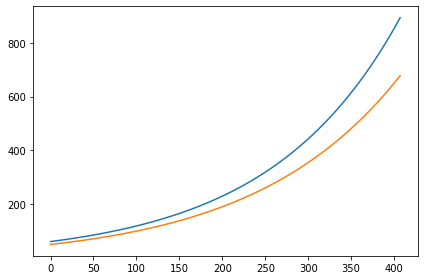

In [122]:
plt.plot(scc, label="scc")
plt.plot(dmgt/MU_c*1000, label="damage")